<a href="https://colab.research.google.com/github/ahmedomer13218/HyperParameter-Tuning/blob/main/RegressionEx_FloodPrediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go



 # Load and Check Data

In [ ]:
df = pd.read_csv('flood.csv')

In [ ]:
df.head()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  Landslides  \
0              2  ...               10                     7           4   
1              4  ...                9                     2           6   
2              9  ...                7                     4           4   
3              4  ...                4                     2           6   
4              5  ...                7                     6           5   

   Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0           2                            3                4            3   
1           2                            1                1            9   
2           8                            6                1            8   
3           6                            8                8            6   
4           3                            3                4            4   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   2                 6             0.450  
1                   1                 3             0.475  
2                   3                 6             0.515  
3                   6                10             0.520  
4                   3                 4             0.475  

[5 rows x 21 columns]

In [ ]:
print('The dimension of the train dataset is:', df.shape)

The dimension of the train dataset is: (50000, 21)


**Drop the 'id' column from both train and test**

In [ ]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [ ]:
df.describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[2])\
    .background_gradient(subset=['std'], cmap='Blues')\
    .background_gradient(subset=['50%'], cmap='BuGn')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

## Check for missing data:

In [ ]:
print(df.isna().sum())

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


> There are no missing values in the dataset. That is good.

In [ ]:
df.nunique().sort_values()

MonsoonIntensity                   17
InadequatePlanning                 17
Watersheds                         17
Landslides                         17
PoliticalFactors                   17
AgriculturalPractices              17
Siltation                          17
IneffectiveDisasterPreparedness    17
RiverManagement                    17
DamsQuality                        17
ClimateChange                      18
Encroachments                      18
Urbanization                       18
DrainageSystems                    18
CoastalVulnerability               18
Deforestation                      18
DeterioratingInfrastructure        18
PopulationScore                    18
TopographyDrainage                 18
WetlandLoss                        19
FloodProbability                   83
dtype: int64

## check for outliers

In [ ]:
# Function to detect outliers in a column
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Detect outliers in each numerical column and store results
outliers_info = {}

for col in df.select_dtypes(include="number").columns:
    outliers = detect_outliers(df, col)
    if not outliers.empty:
        outliers_info[col] = len(outliers)
        print(f"Column '{col}' has {len(outliers)} outliers.")

Column 'MonsoonIntensity' has 686 outliers.
Column 'TopographyDrainage' has 711 outliers.
Column 'RiverManagement' has 661 outliers.
Column 'Deforestation' has 682 outliers.
Column 'Urbanization' has 687 outliers.
Column 'ClimateChange' has 647 outliers.
Column 'DamsQuality' has 741 outliers.
Column 'Siltation' has 671 outliers.
Column 'AgriculturalPractices' has 683 outliers.
Column 'Encroachments' has 688 outliers.
Column 'IneffectiveDisasterPreparedness' has 656 outliers.
Column 'DrainageSystems' has 731 outliers.
Column 'CoastalVulnerability' has 747 outliers.
Column 'Landslides' has 645 outliers.
Column 'Watersheds' has 686 outliers.
Column 'DeterioratingInfrastructure' has 663 outliers.
Column 'PopulationScore' has 677 outliers.
Column 'WetlandLoss' has 674 outliers.
Column 'InadequatePlanning' has 670 outliers.
Column 'PoliticalFactors' has 722 outliers.
Column 'FloodProbability' has 219 outliers.


In [ ]:
# Function to drop outliers in specific columns
def drop_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_remove_outliers = []

# Drop the outliers
#df_cleaned = drop_outliers(df, columns_to_remove_outliers)

# Check the shape of the cleaned dataframe
print(f"Shape of the dataframe before dropping outliers: {df.shape}")
#print(f"Shape of the dataframe after dropping outliers: {df_cleaned.shape}")

Shape of the dataframe before dropping outliers: (38984, 23)
Shape of the dataframe after dropping outliers: (36048, 23)


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
num_cols = [col for col in df.columns if col !='FloodProbability']

In [ ]:
# Loop through each numerical column
for col in df.columns:
    # Create a subplot with one row and three columns
    fig = make_subplots(rows=1, cols=3, column_widths=[0.6, 0.2, 0.2],
                        subplot_titles=[f'{col} Distribution ', 'Quantiles '])

    # Add the histogram for train dataset
    fig.add_trace(go.Histogram(x=df[col], name=f'Train {col}', opacity=0.7,
                               marker=dict(color="#0A4D68", line=dict(color='#DBE6EC', width=0.5))),
                  row=1, col=1)

    # Add the vertical boxplot for train dataset
    fig.add_trace(go.Box(y=df[col], name=f'Train {col}', orientation='v', boxpoints='outliers',
                         marker=dict(color='#9bf6ff')), row=1, col=2)


    # Update layout
    fig.update_layout(height=400, width=1000, showlegend=False,
                      paper_bgcolor='black', plot_bgcolor='black',
                      font=dict(color="white"),
                      barmode='overlay')

    # Show the figure
    fig.show()


## Bivariate Analysis

### Numerical vs Numerical:

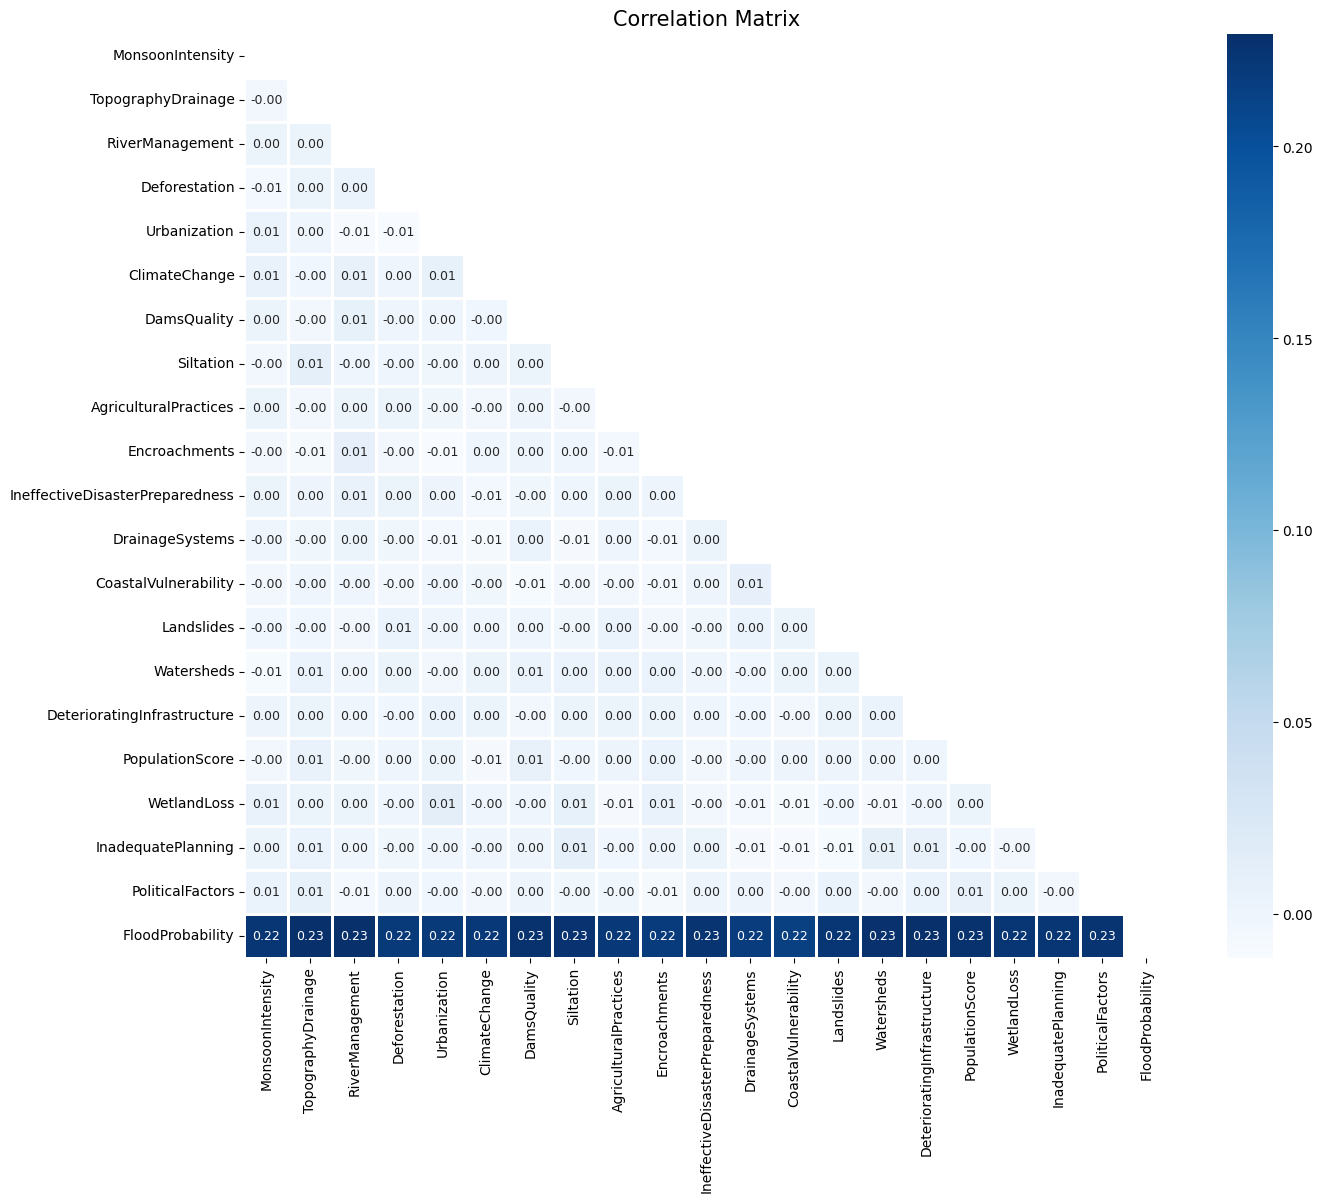

In [ ]:
corr_matrix = df[df.columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Correlation Matrix', fontsize=15)
plt.show()

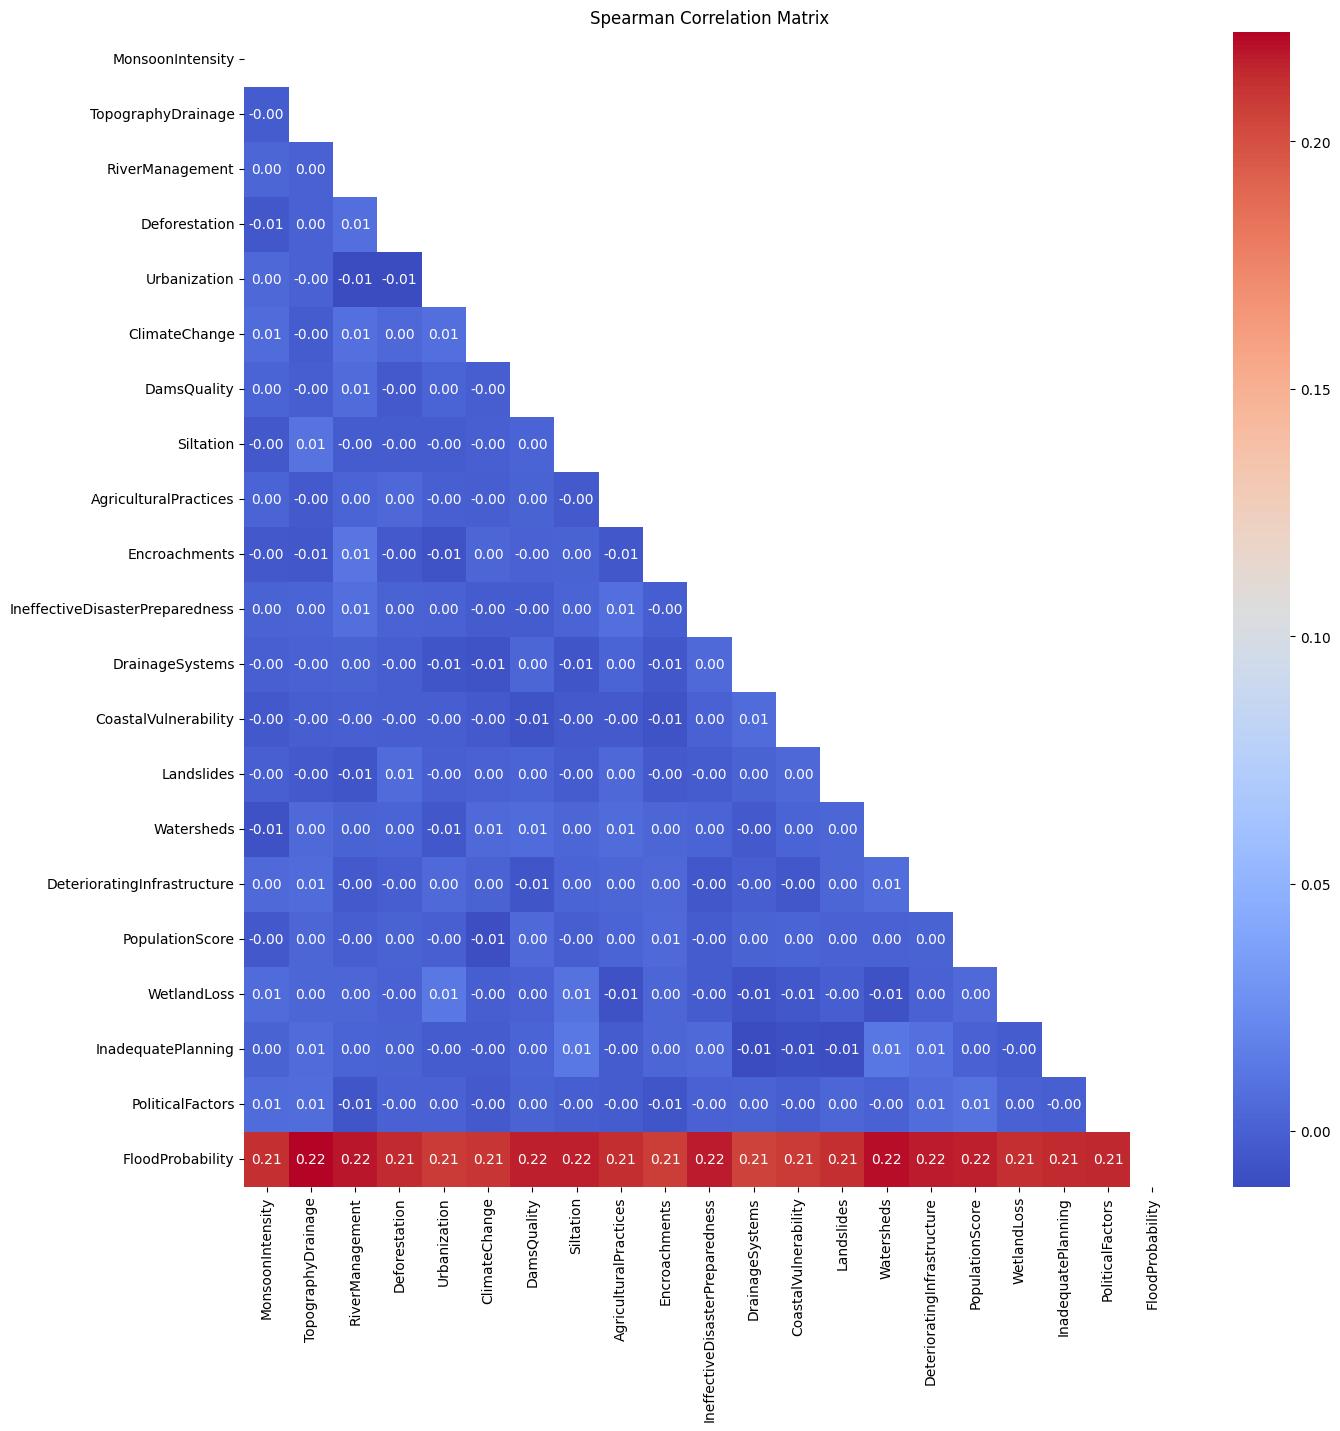

In [ ]:
# Calculate Spearman correlation matrix
spearman_corr = df[df.columns].corr(method='spearman')
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# Visualize the Spearman correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(spearman_corr,mask=mask, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":10})
plt.title('Spearman Correlation Matrix')
plt.show()

## Feature Engineering

## data spliting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target='FloodProbability'

In [ ]:
X=df.drop(columns=[target])
y=df[target]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1,  random_state=42)

In [ ]:
X_train.shape

(36000, 20)

In [ ]:
X_test.shape

(10000, 20)

In [ ]:
X_val.shape

(4000, 20)

# Modeling

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras_tuner as kt

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu',input_shape=(20,)),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(1)
      ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1050      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6201 (24.22 KB)
Trainable params: 6201 (24.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss="mean_squared_error" ,metrics=['mean_absolute_error'])

In [ ]:
X_val_scaled.shape

(4000, 20)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0292 - mean_absolute_error: 0.1185 - val_loss: 0.0084 - val_mean_absolute_error: 0.0722
Epoch 2/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0055 - mean_absolute_error: 0.0580 - val_loss: 0.0041 - val_mean_absolute_error: 0.0503
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0032 - mean_absolute_error: 0.0443 - val_loss: 0.0026 - val_mean_absolute_error: 0.0404
Epoch 4/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0369 - val_loss: 0.0020 - val_mean_absolute_error: 0.0349
Epoch 5/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0321 - val_loss: 0.0016 - val_mean_absolute_error: 0.0311
Epoch 6/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0287 - val_loss: 0.0012 - val_mean_absolute_error: 0.0276
Epoc

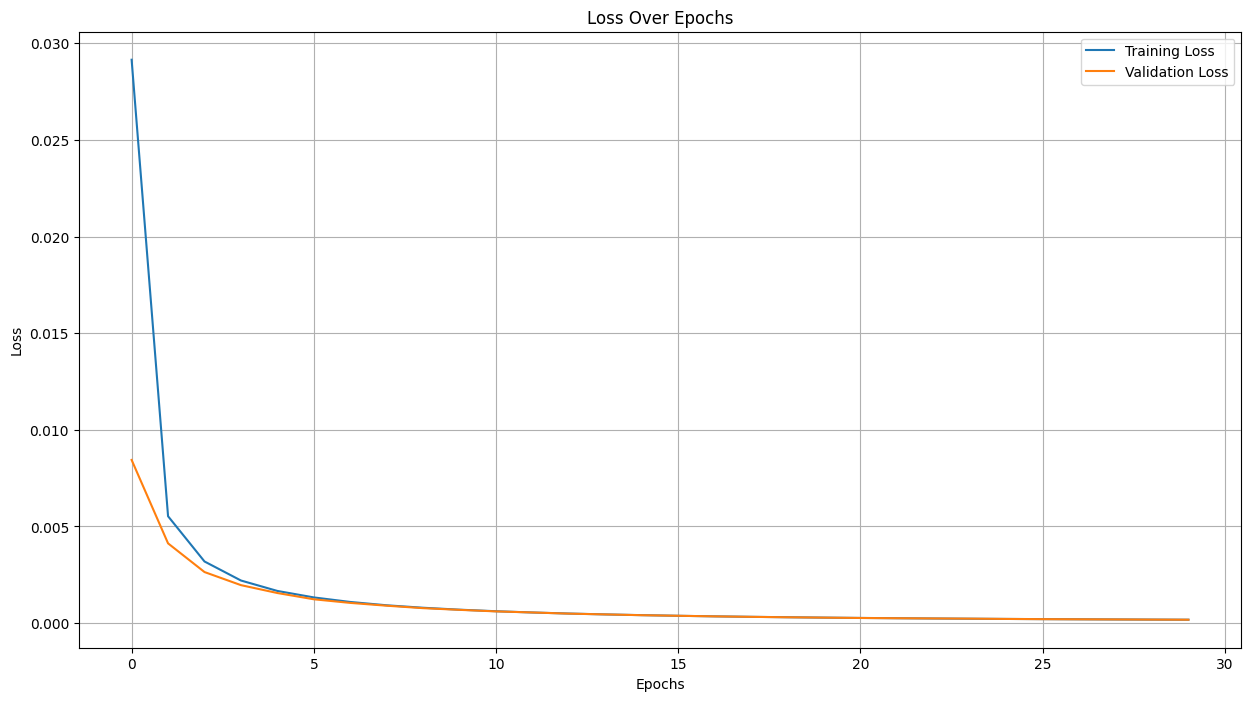

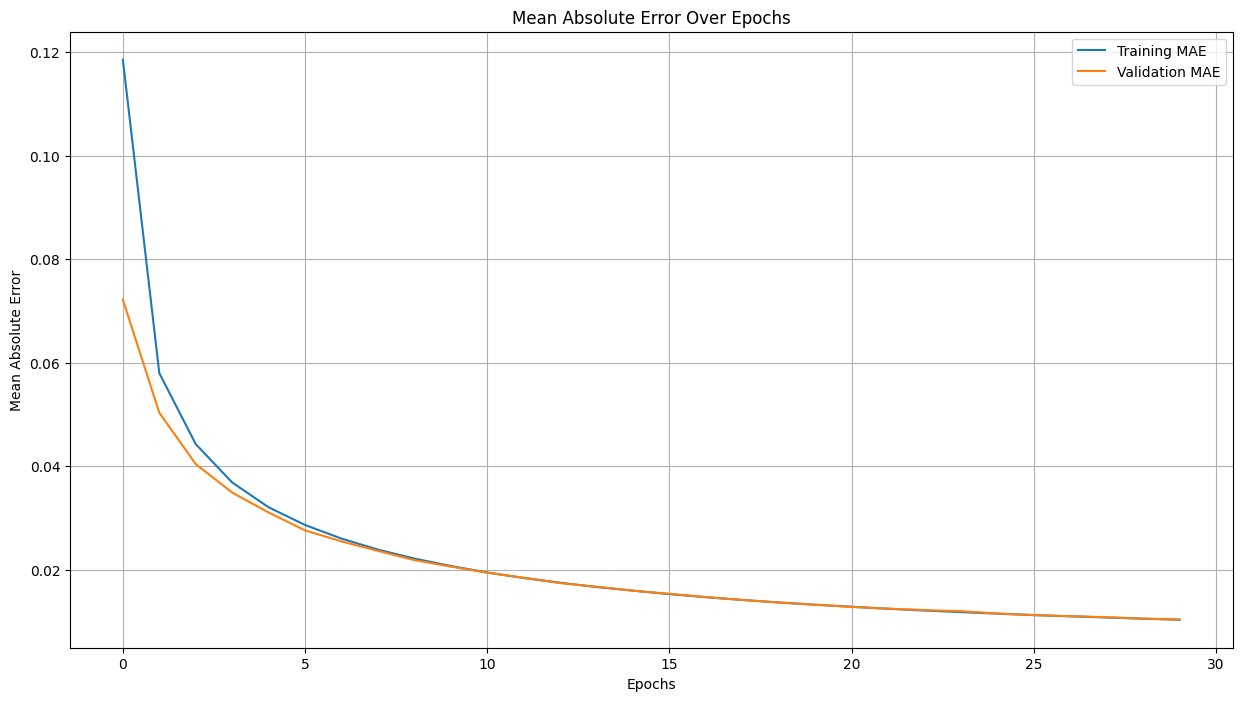

313/313 [==============================] - 0s 1ms/step
Validation R² score: 0.9286085633067795
Validation R² score: 0.9286085633067795
Test R² score: 0.9305247751395594


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 7.5256e-05 - mean_absolute_error: 0.0067 - val_loss: 7.2889e-05 - val_mean_absolute_error: 0.0066
Epoch 2/30
1125/1125 [==============================] - 2s 2ms/step - loss: 7.4967e-05 - mean_absolute_error: 0.0067 - val_loss: 7.3347e-05 - val_mean_absolute_error: 0.0066
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 7.4729e-05 - mean_absolute_error: 0.0067 - val_loss: 7.3603e-05 - val_mean_absolute_error: 0.0066
Epoch 4/30
1125/1125 [==============================] - 2s 2ms/step - loss: 7.4496e-05 - mean_absolute_error: 0.0067 - val_loss: 7.2369e-05 - val_mean_absolute_error: 0.0066
Epoch 5/30
1125/1125 [==============================] - 2s 2ms/step - loss: 7.4250e-05 - mean_absolute_error: 0.0066 - val_loss: 7.2675e-05 - val_mean_absolute_error: 0.0066
Epoch 6/30
1125/1125 [==============================] - 2s 2ms/step - loss: 7.3930e-05 - mean_absolute_error: 0.0066 - val_loss: 7

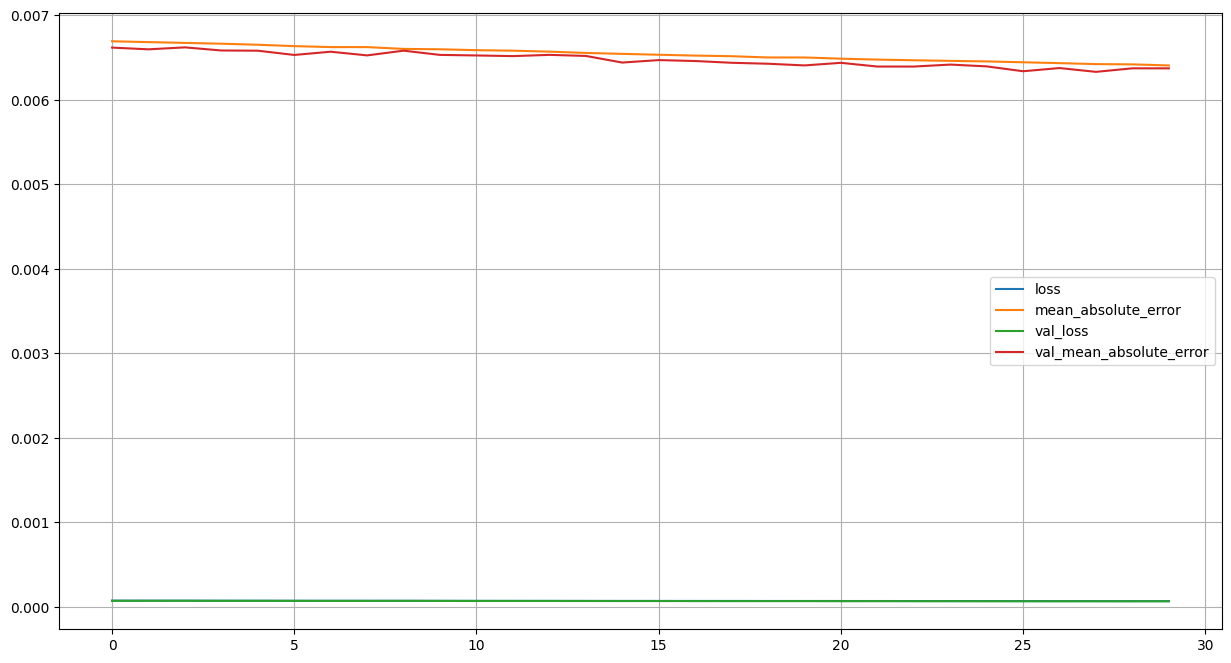

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca()
plt.show()

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 6.9415e-05 - mean_absolute_error: 0.0064


[6.941544415894896e-05, 0.006398557219654322]

In [ ]:
y_train_pred = model.predict(X_train_scaled)

1125/1125 [==============================] - 1s 998us/step


In [ ]:
y_val_pred = model.predict(X_val_scaled)

125/125 [==============================] - 0s 973us/step


In [ ]:
y_test_pred = model.predict(X_test_scaled)

313/313 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_train = r2_score(y_train, y_train_pred)

In [ ]:
print(f'Train R² score: {r2_train}')

Train R² score: 0.9726126678609129


In [ ]:
r2_val = r2_score(y_val, y_val_pred)

In [ ]:
print(f'Validation R² score: {r2_val}')

Validation R² score: 0.9725028650817663


In [ ]:
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f'Test R² score: {r2_test}')

Test R² score: 0.9721288705004086


I Have trained the model on 30 epochs 4 time

*   there is no variance difference
*   the desirable performance i want is 0.999 (notebook on kaggle)
*   the bias diff is bigger  (underfitting problem)
    * train more
    * increase complexity ( more layer )





###### train more

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=60, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/60
1125/1125 [==============================] - 2s 1ms/step - loss: 6.0725e-05 - mean_absolute_error: 0.0060 - val_loss: 5.9449e-05 - val_mean_absolute_error: 0.0059
Epoch 2/60
1125/1125 [==============================] - 2s 1ms/step - loss: 6.0647e-05 - mean_absolute_error: 0.0060 - val_loss: 5.9861e-05 - val_mean_absolute_error: 0.0060
Epoch 3/60
1125/1125 [==============================] - 2s 1ms/step - loss: 6.0569e-05 - mean_absolute_error: 0.0060 - val_loss: 6.0120e-05 - val_mean_absolute_error: 0.0060
Epoch 4/60
1125/1125 [==============================] - 2s 1ms/step - loss: 6.0446e-05 - mean_absolute_error: 0.0060 - val_loss: 5.9300e-05 - val_mean_absolute_error: 0.0060
Epoch 5/60
1125/1125 [==============================] - 2s 1ms/step - loss: 6.0347e-05 - mean_absolute_error: 0.0060 - val_loss: 5.9538e-05 - val_mean_absolute_error: 0.0059
Epoch 6/60
1125/1125 [==============================] - 2s 1ms/step - loss: 6.0249e-05 - mean_absolute_error: 0.0060 - val_loss: 5

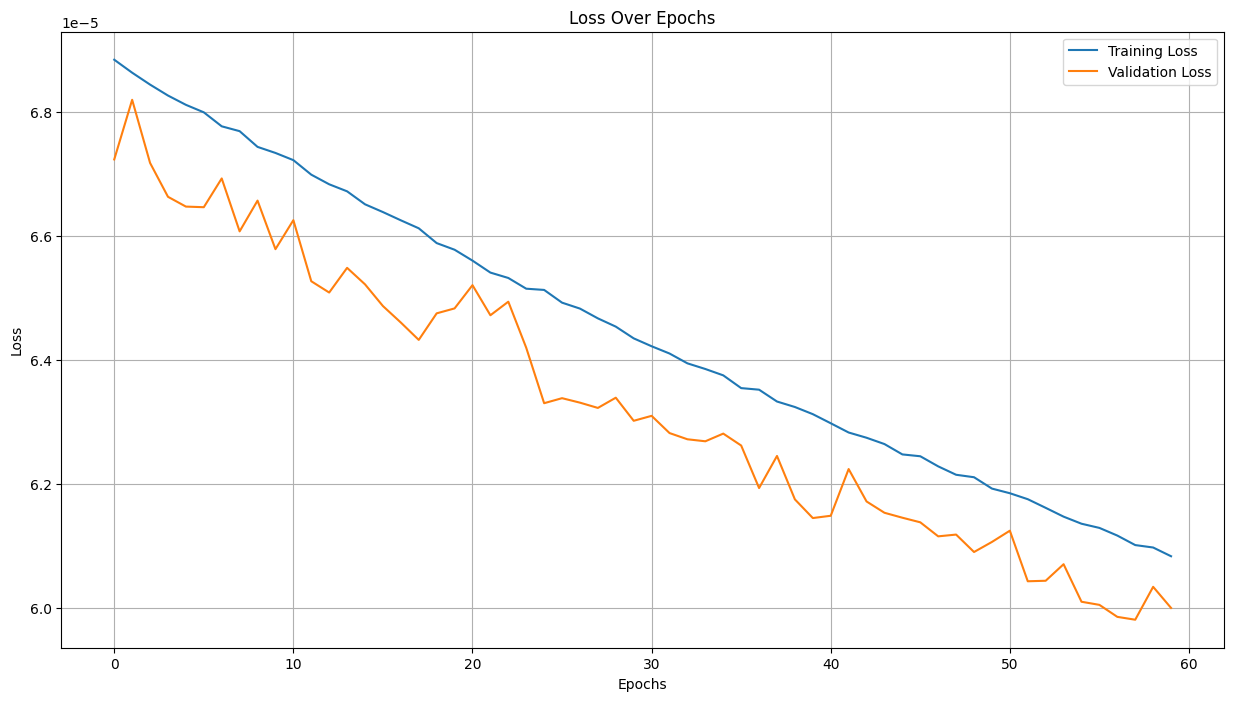

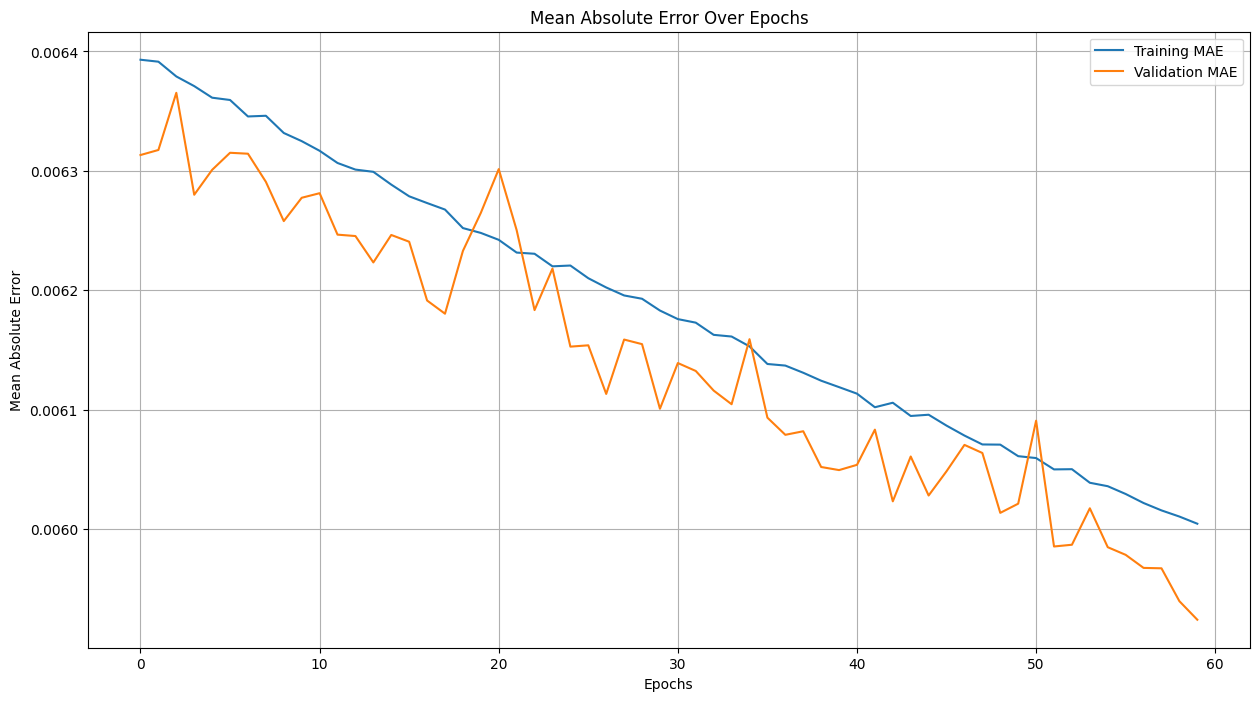

In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

313/313 [==============================] - 0s 939us/step


In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

Validation R² score: 0.9756778217110504
Validation R² score: 0.9756778217110504
Test R² score: 0.9752661506900777


another 60 epochs is been added -> the improvment is 0.003 in R2
---
try more epochs




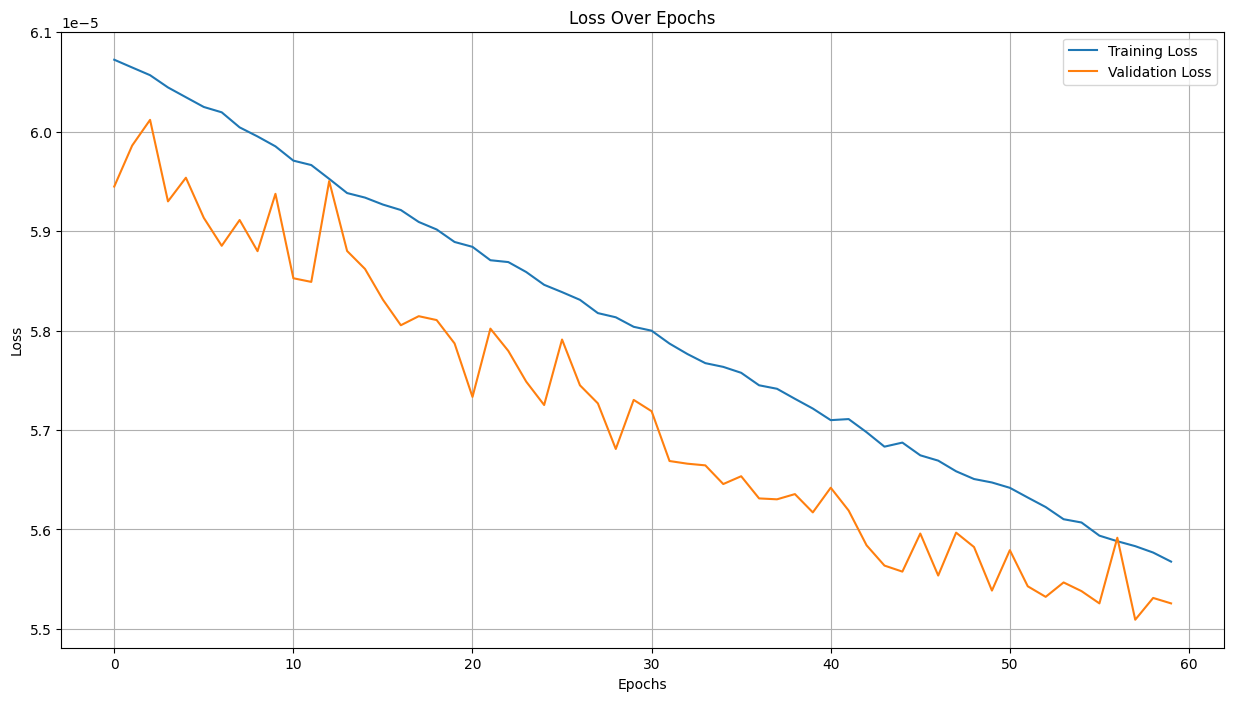

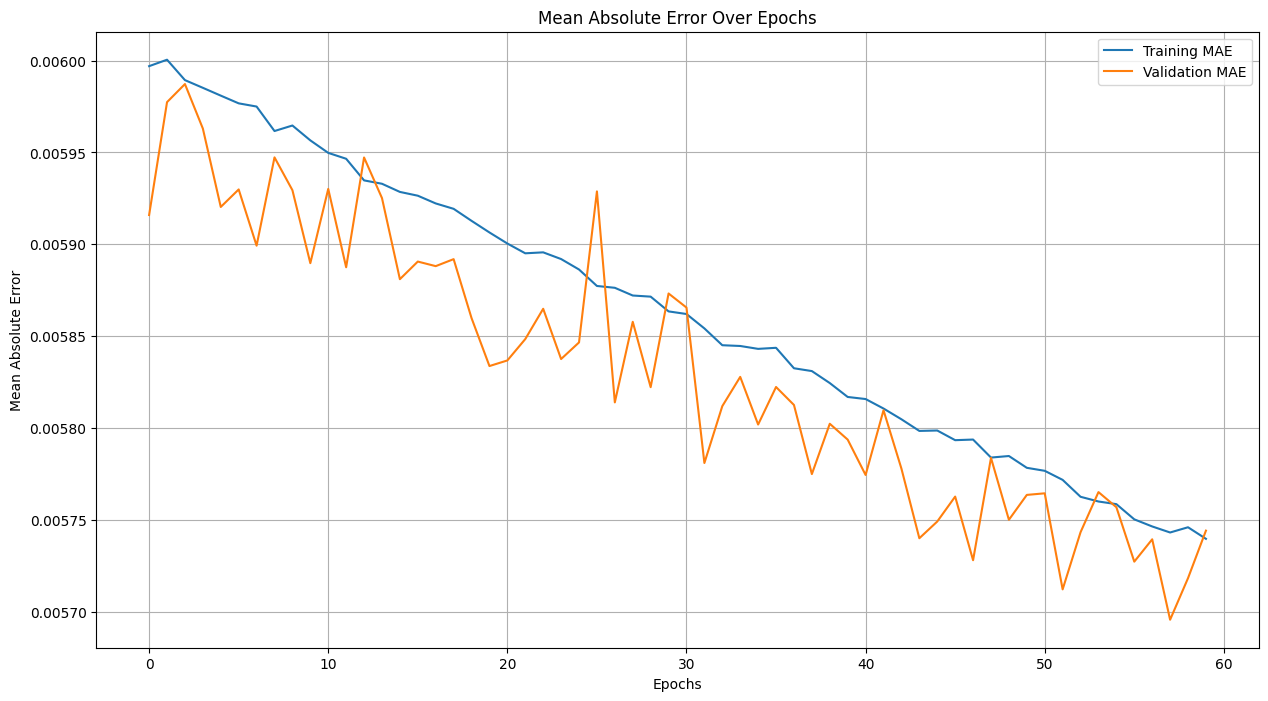

In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

Validation R² score: 0.9756778217110504
Validation R² score: 0.9756778217110504
Test R² score: 0.9752661506900777


another 60 epochs and < 0.001  improvment added -> more training is not enough



Try More complex model

In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu',input_shape=(20,)),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(1)
      ])

In [ ]:
model.compile(optimizer="sgd", loss="mean_squared_error" ,metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=120, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/120
1125/1125 [==============================] - 2s 2ms/step - loss: 8.1149e-05 - mean_absolute_error: 0.0069 - val_loss: 8.1705e-05 - val_mean_absolute_error: 0.0069
Epoch 2/120
1125/1125 [==============================] - 2s 2ms/step - loss: 8.0992e-05 - mean_absolute_error: 0.0069 - val_loss: 8.2554e-05 - val_mean_absolute_error: 0.0070
Epoch 3/120
1125/1125 [==============================] - 2s 2ms/step - loss: 8.0930e-05 - mean_absolute_error: 0.0069 - val_loss: 8.1293e-05 - val_mean_absolute_error: 0.0069
Epoch 4/120
1125/1125 [==============================] - 2s 2ms/step - loss: 8.0874e-05 - mean_absolute_error: 0.0069 - val_loss: 8.1069e-05 - val_mean_absolute_error: 0.0069
Epoch 5/120
1125/1125 [==============================] - 2s 2ms/step - loss: 8.0670e-05 - mean_absolute_error: 0.0069 - val_loss: 8.2160e-05 - val_mean_absolute_error: 0.0069
Epoch 6/120
1125/1125 [==============================] - 2s 2ms/step - loss: 8.0655e-05 - mean_absolute_error: 0.0068 - val_l

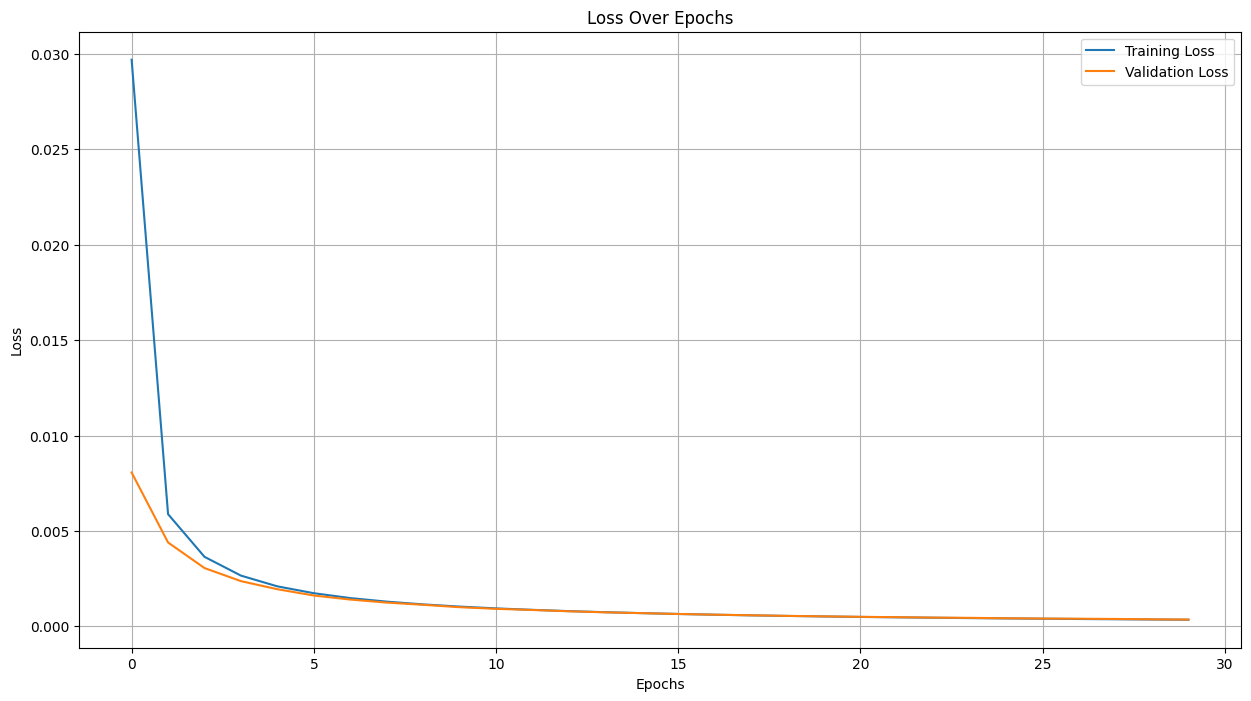

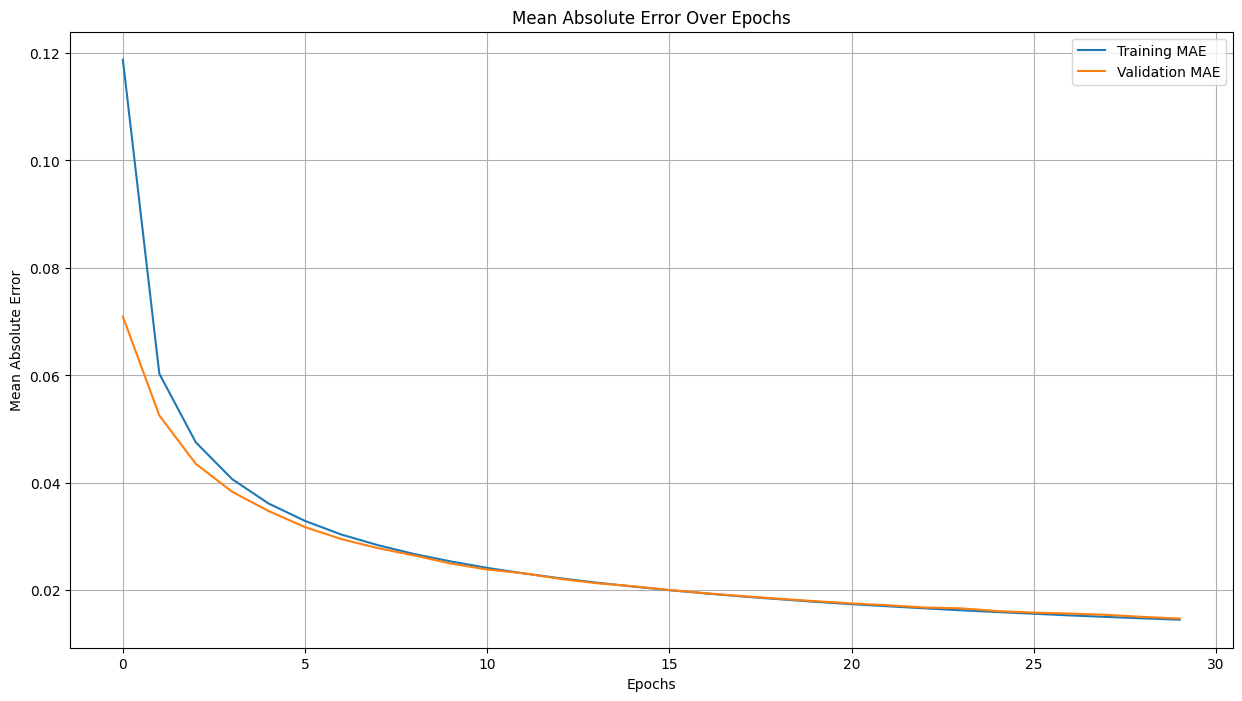

In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

313/313 [==============================] - 0s 1ms/step


In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

Validation R² score: 0.8583201516661915
Validation R² score: 0.8583201516661915
Test R² score: 0.8544967994819633


train for another 60 epochs

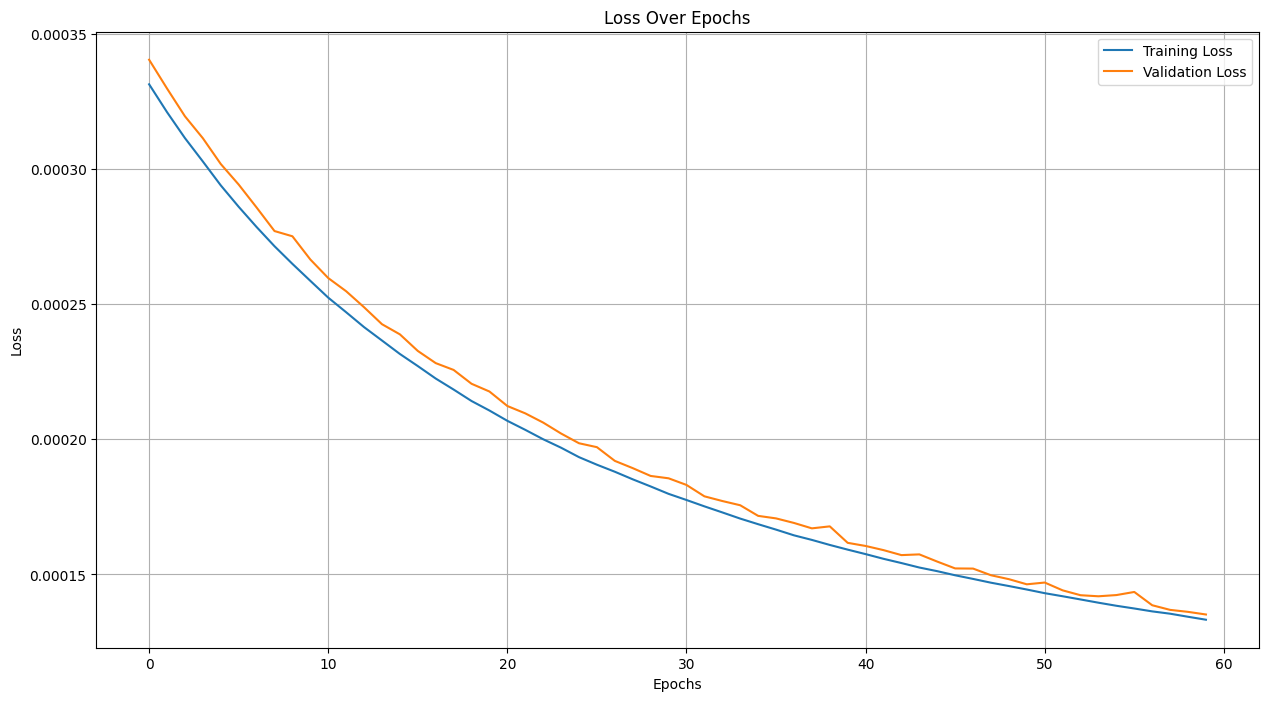

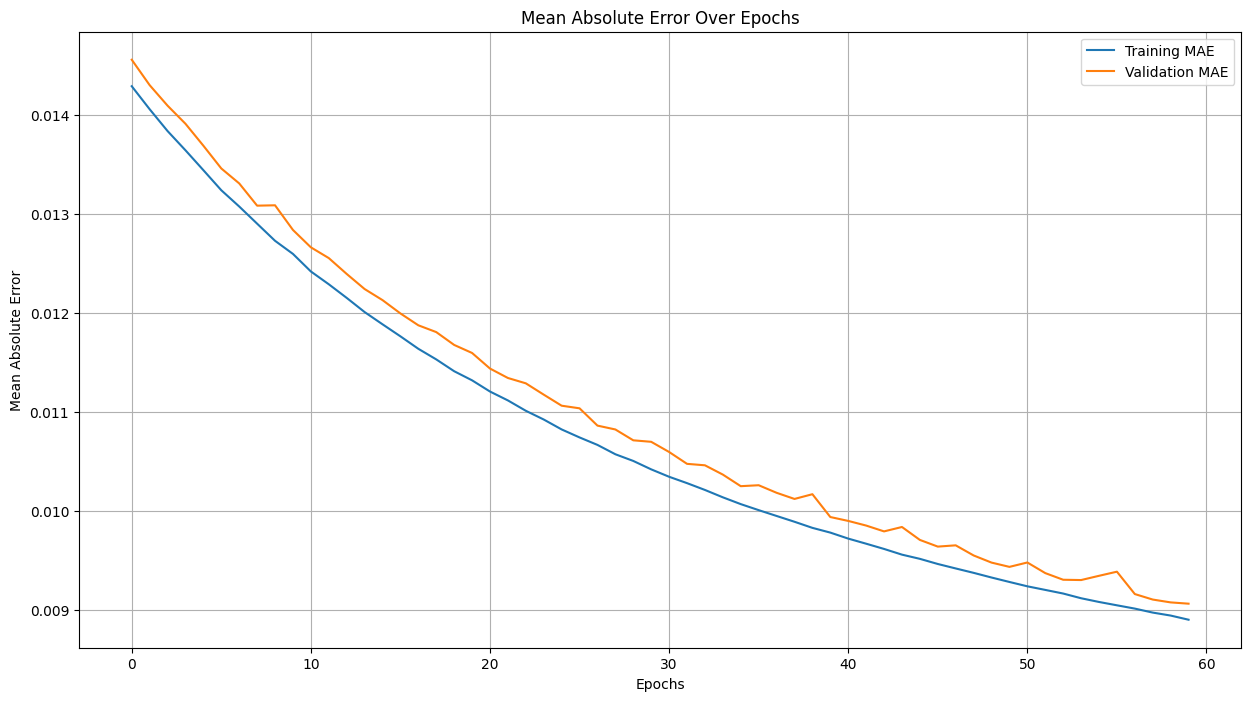

313/313 [==============================] - 0s 1ms/step
Validation R² score: 0.9452100027726624
Validation R² score: 0.9452100027726624
Test R² score: 0.9435728911936682


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

for another 60 epochs

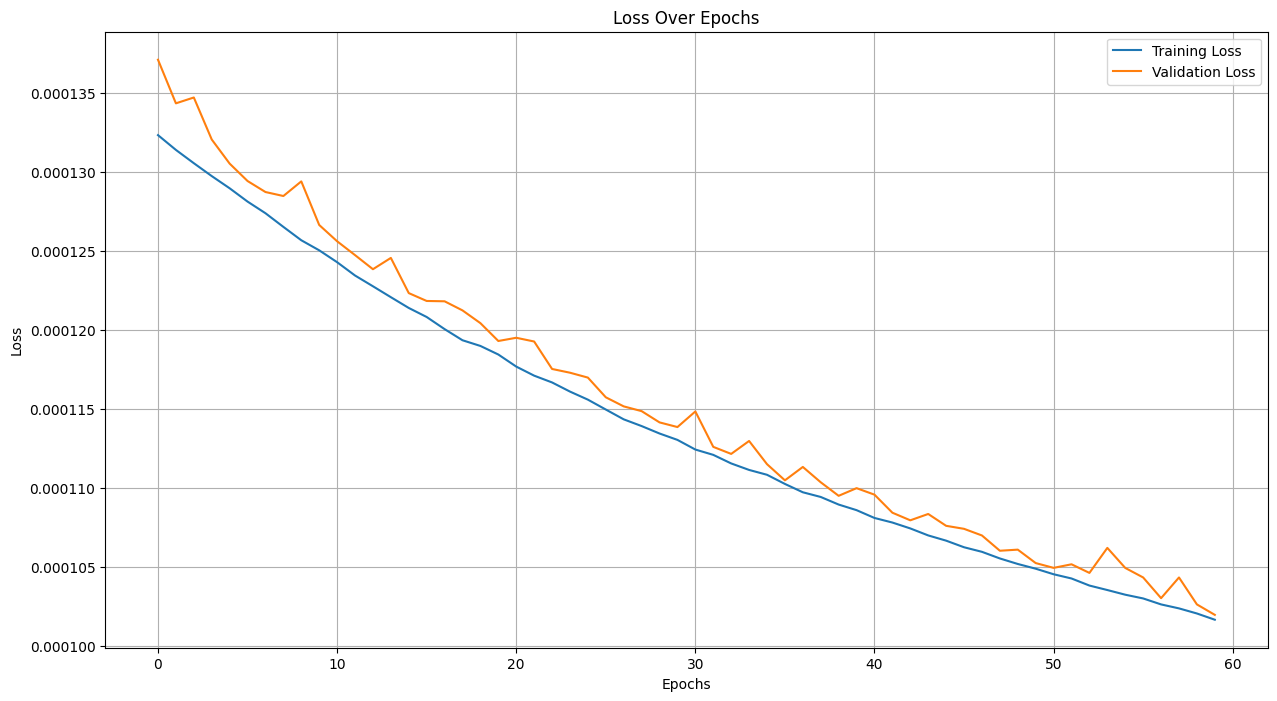

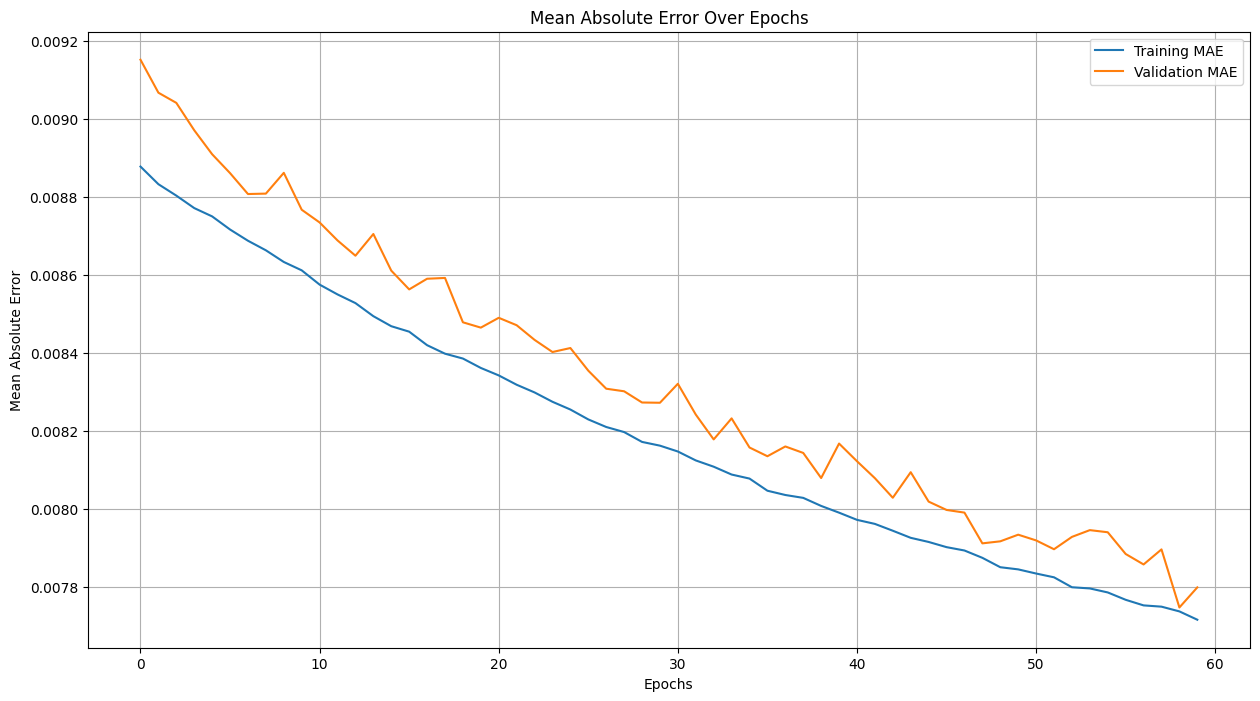

313/313 [==============================] - 0s 1ms/step
Validation R² score: 0.9586722545087796
Validation R² score: 0.9586722545087796
Test R² score: 0.9576230128381252


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

for another 120 epochs

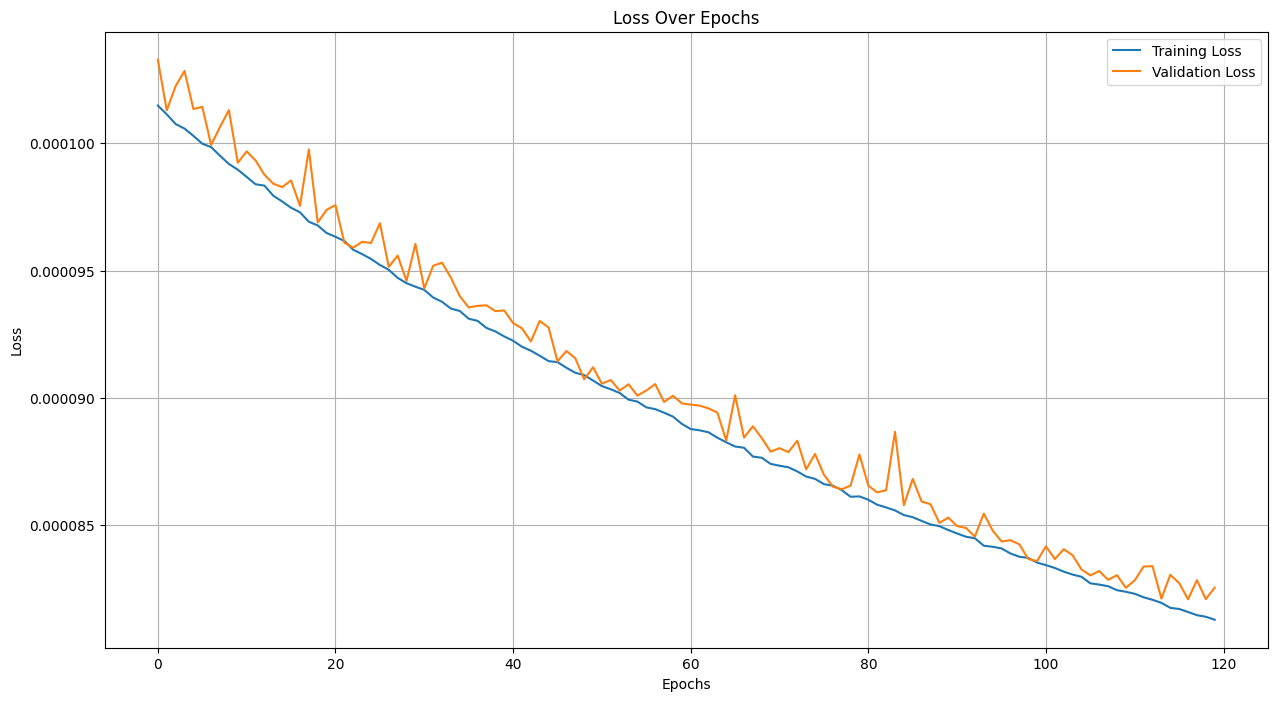

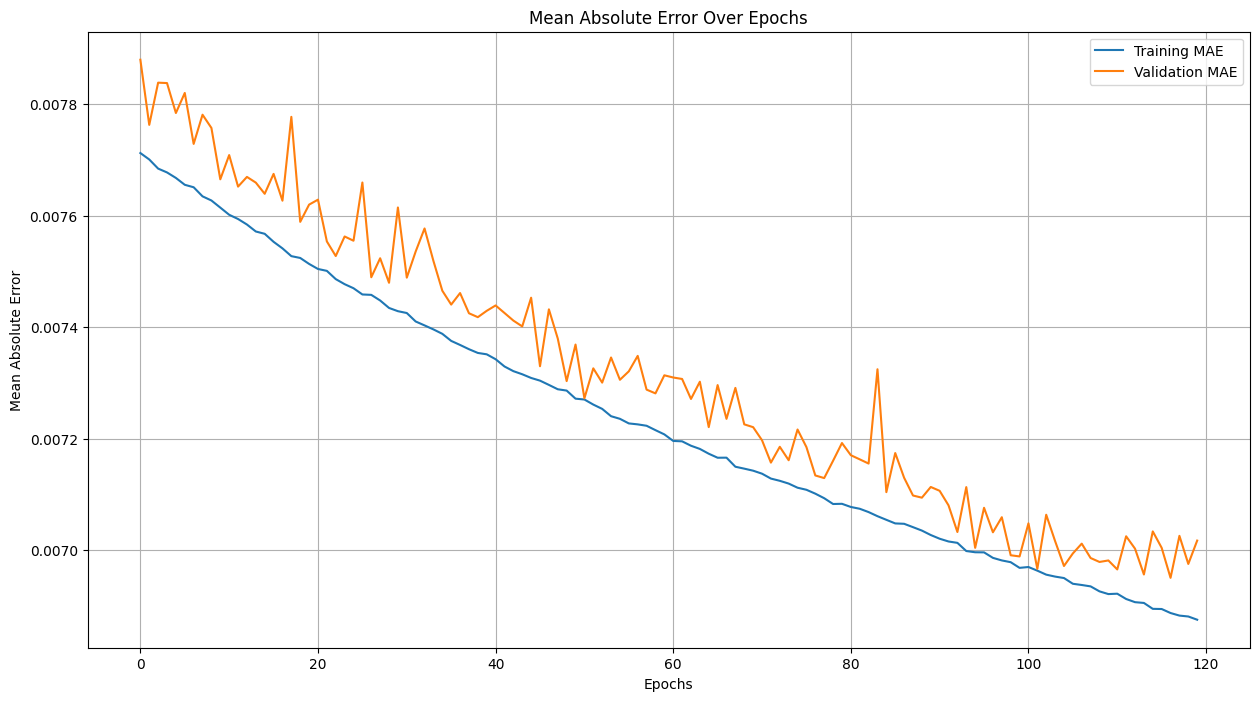

313/313 [==============================] - 0s 1ms/step
Validation R² score: 0.9665413086935079
Validation R² score: 0.9665413086935079
Test R² score: 0.966209196388534


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

another 120 epochs

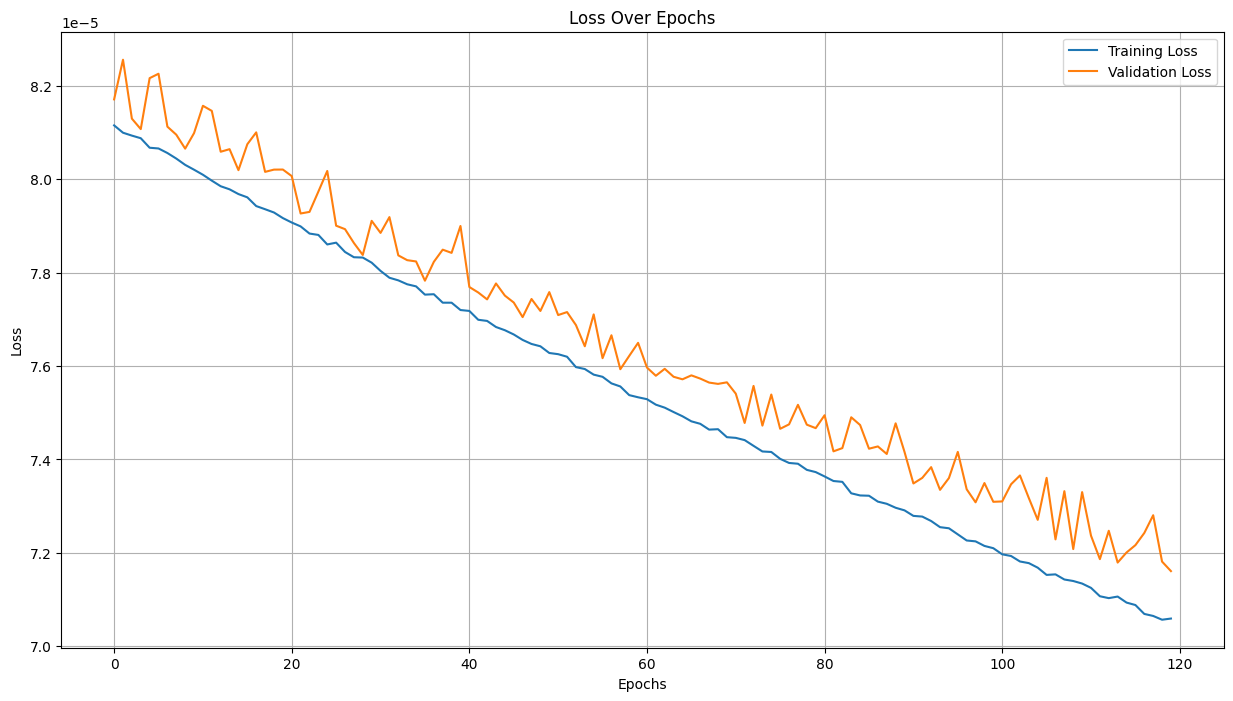

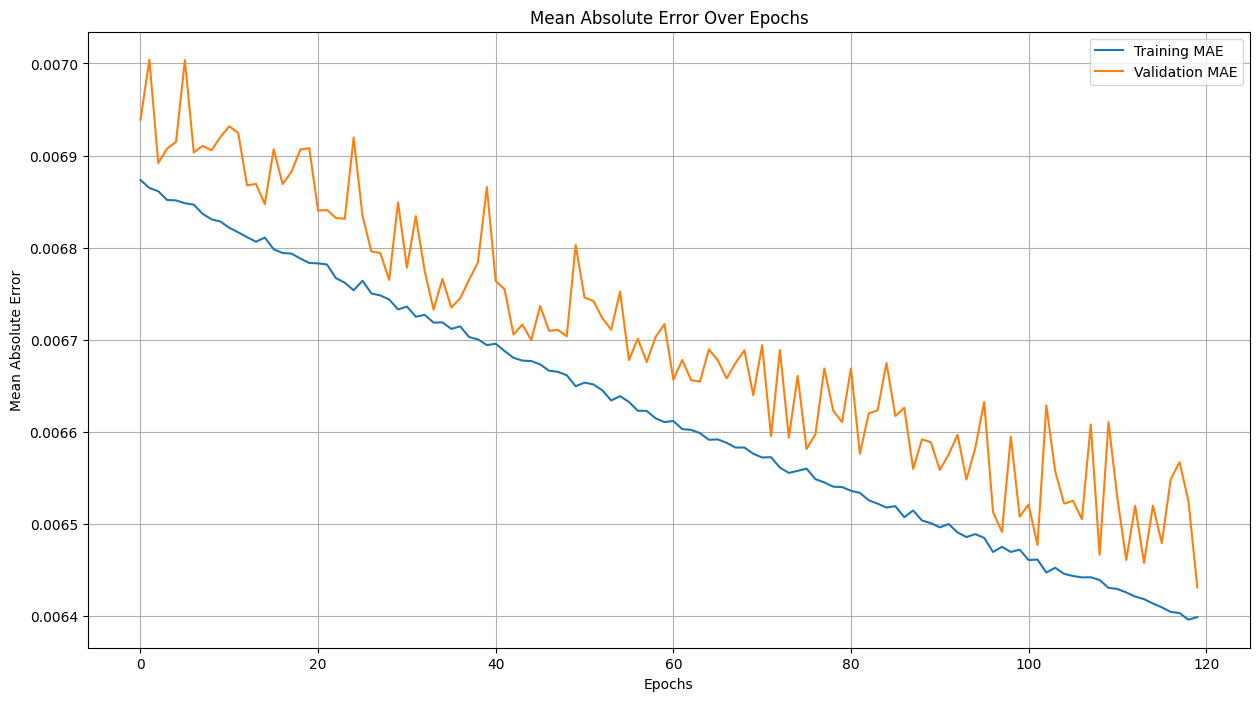

313/313 [==============================] - 0s 1ms/step
Validation R² score: 0.970973949759122
Validation R² score: 0.970973949759122
Test R² score: 0.9705362024365696


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

save the model

In [ ]:
model.save('floodRegressionModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


for another 120 epochs and we get only 0.004 improvment

Try to Tune the hyber parameters

#### I'm guessing that the learning rate is the problem let's try tuning it first

In [ ]:
# 1cycle learning rate scheduler
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        keras.backend.set_value(self.model.optimizer.lr, rate)


In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu',input_shape=(20,)),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(1)
      ])

In [ ]:
from keras.optimizers import SGD

In [ ]:
# Total number of iterations (batches) for the training
epochs = 120
batch_size = 32
total_batches = len(X_train_scaled) // batch_size * epochs

# Create an instance of the OneCycleScheduler
one_cycle_scheduler = OneCycleScheduler(iterations=total_batches, max_rate=0.01)

optimizer = SGD(lr=0.001, momentum=0.9)

In [ ]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=120, validation_data = (X_val_scaled, y_val), batch_size=32, callbacks=[one_cycle_scheduler])

Epoch 1/120
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0331 - mean_absolute_error: 0.1045 - val_loss: 0.0059 - val_mean_absolute_error: 0.0592
Epoch 2/120
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0038 - mean_absolute_error: 0.0476 - val_loss: 0.0027 - val_mean_absolute_error: 0.0399
Epoch 3/120
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0346 - val_loss: 0.0016 - val_mean_absolute_error: 0.0309
Epoch 4/120
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0278 - val_loss: 0.0011 - val_mean_absolute_error: 0.0263
Epoch 5/120
1125/1125 [==============================] - 2s 2ms/step - loss: 9.0199e-04 - mean_absolute_error: 0.0235 - val_loss: 8.1625e-04 - val_mean_absolute_error: 0.0222
Epoch 6/120
1125/1125 [==============================] - 2s 2ms/step - loss: 6.7644e-04 - mean_absolute_error: 0.0203 - val_loss: 6.3369e-04 - val_mean_absol

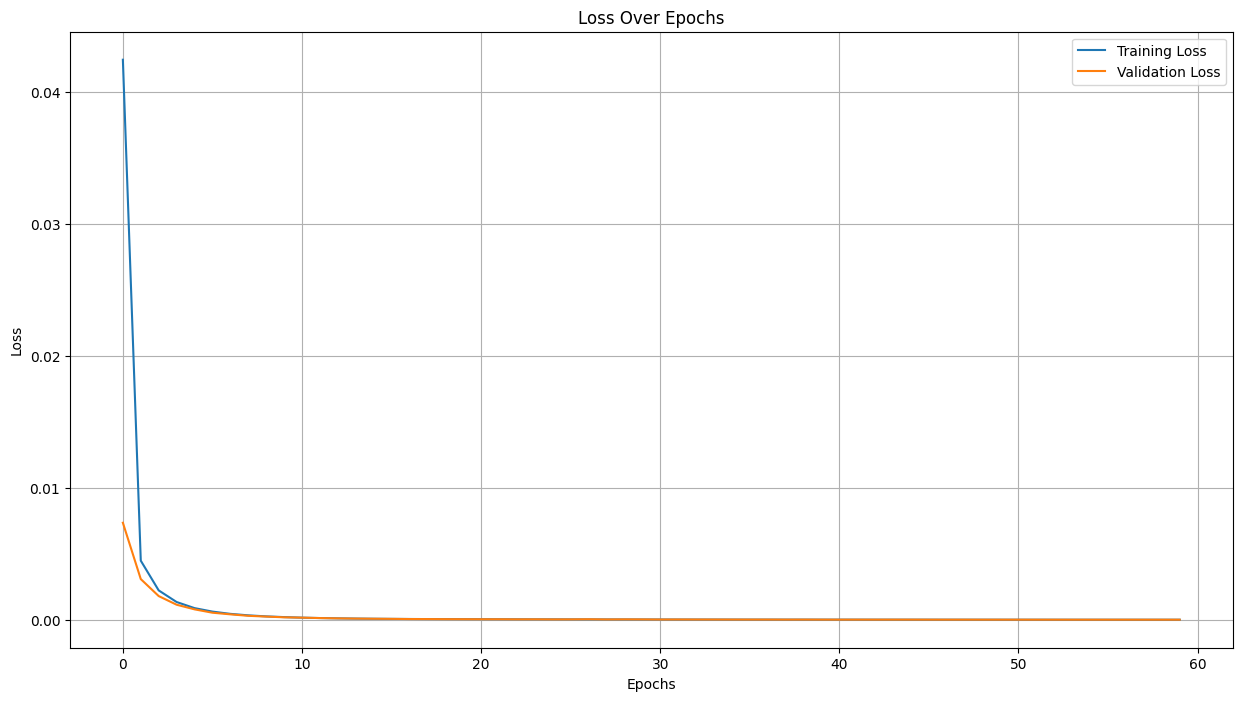

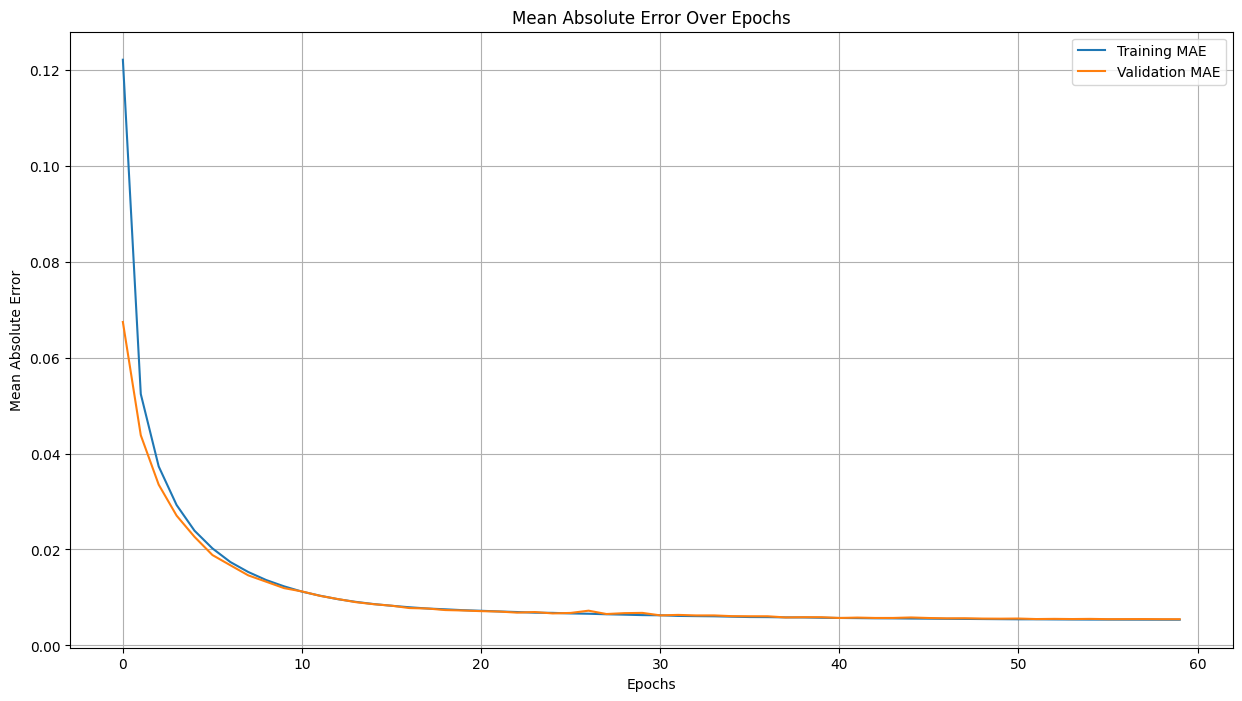

313/313 [==============================] - 0s 1ms/step
Validation R² score: 0.9791239693961148
Validation R² score: 0.9791239693961148
Test R² score: 0.9797830639714418


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

train for another 60 epochs

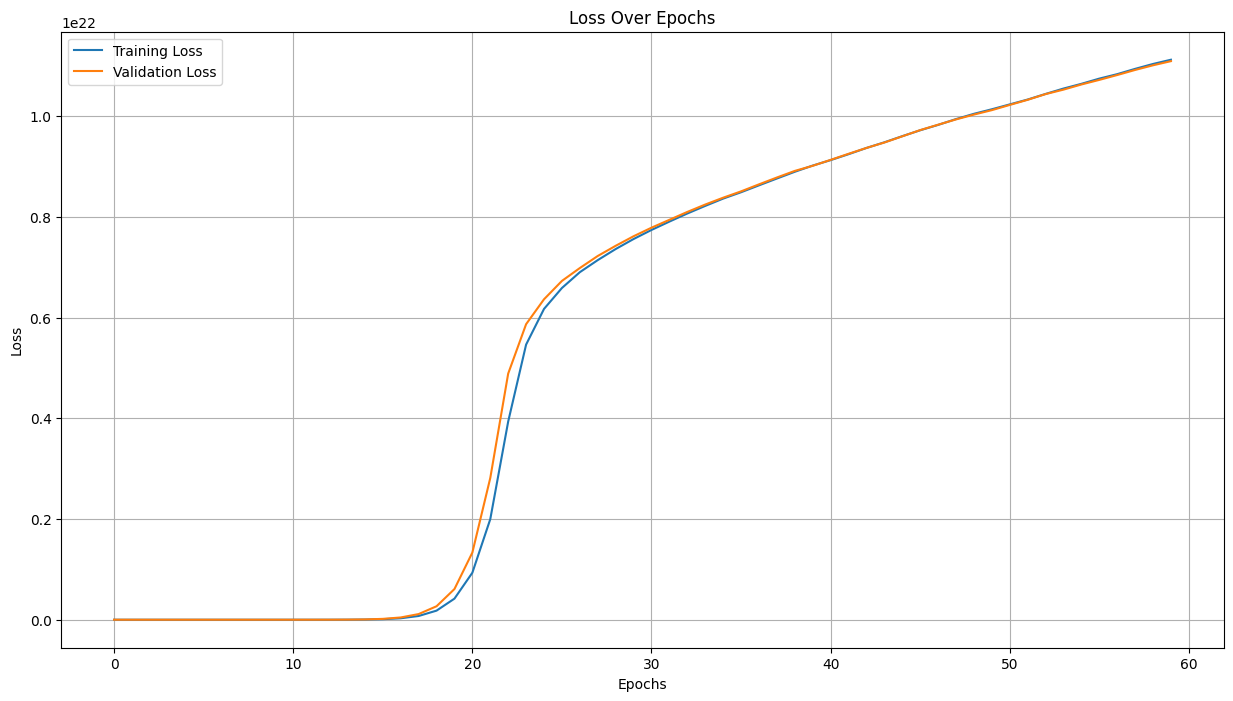

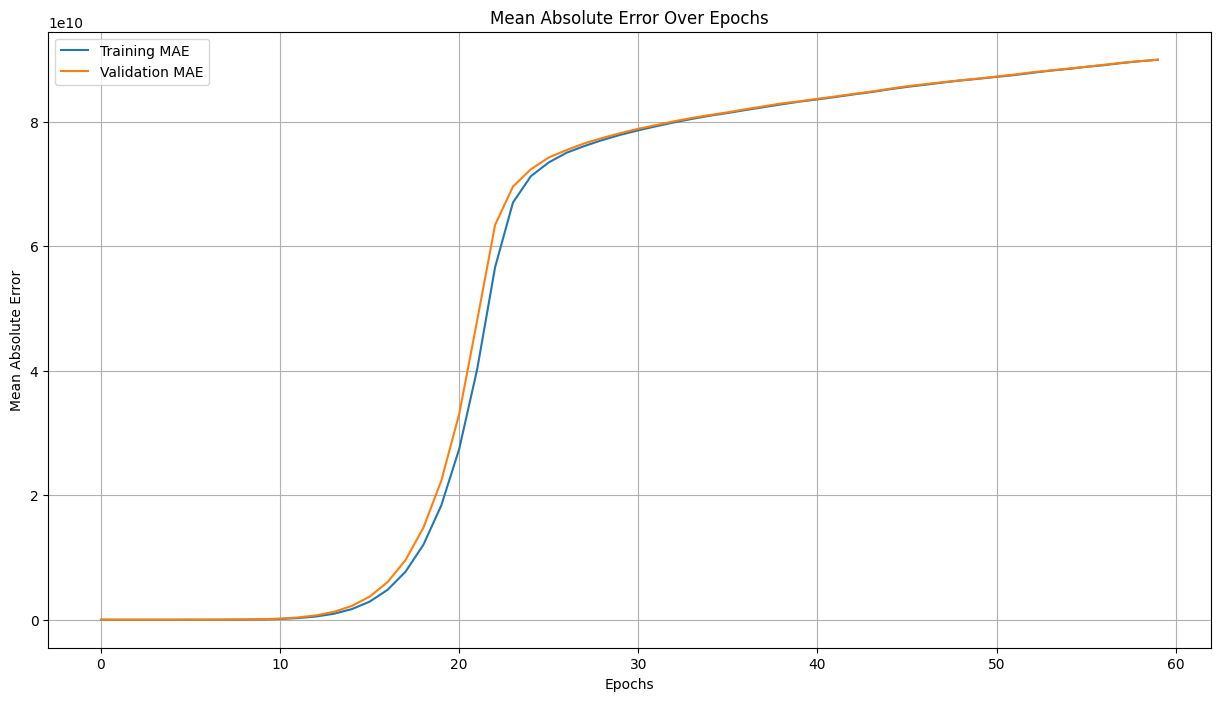

313/313 [==============================] - 0s 1ms/step
Validation R² score: -4.4967006239688445e+24
Validation R² score: -4.4967006239688445e+24
Test R² score: -4.438199704337581e+24


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

😂😂😂😂😂😂 LOL

the error was in the initialization

try to train for 120 epochs

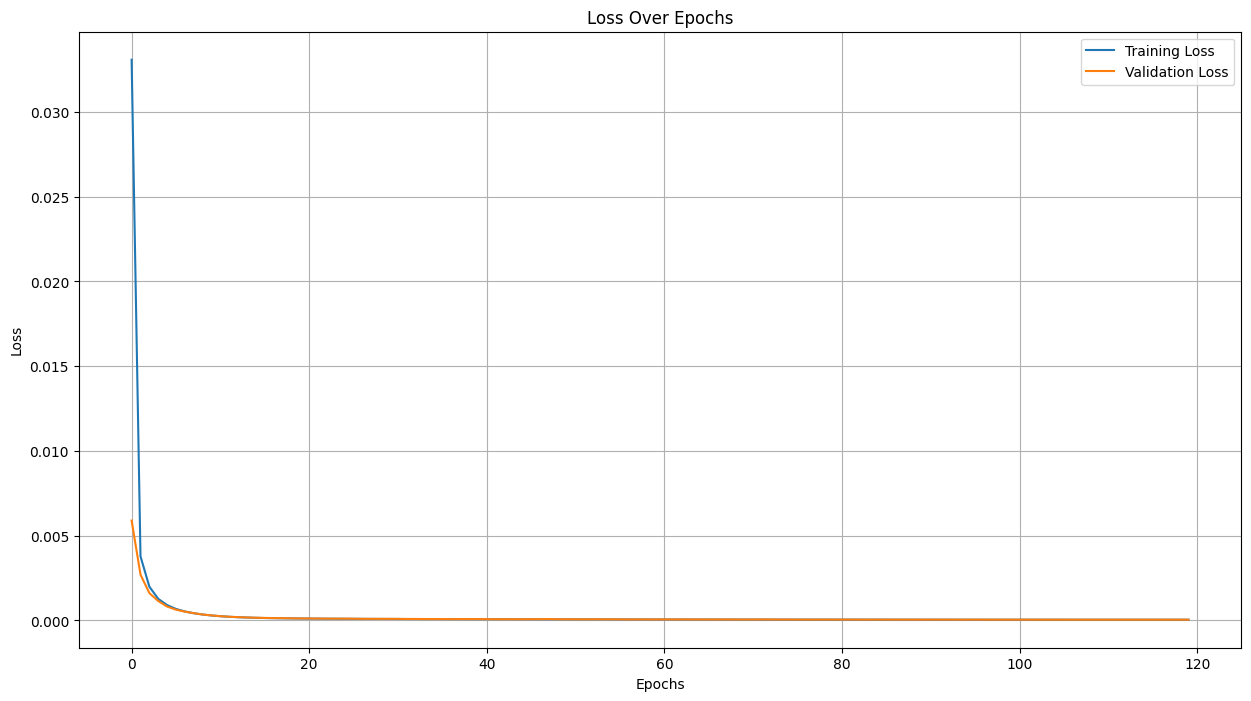

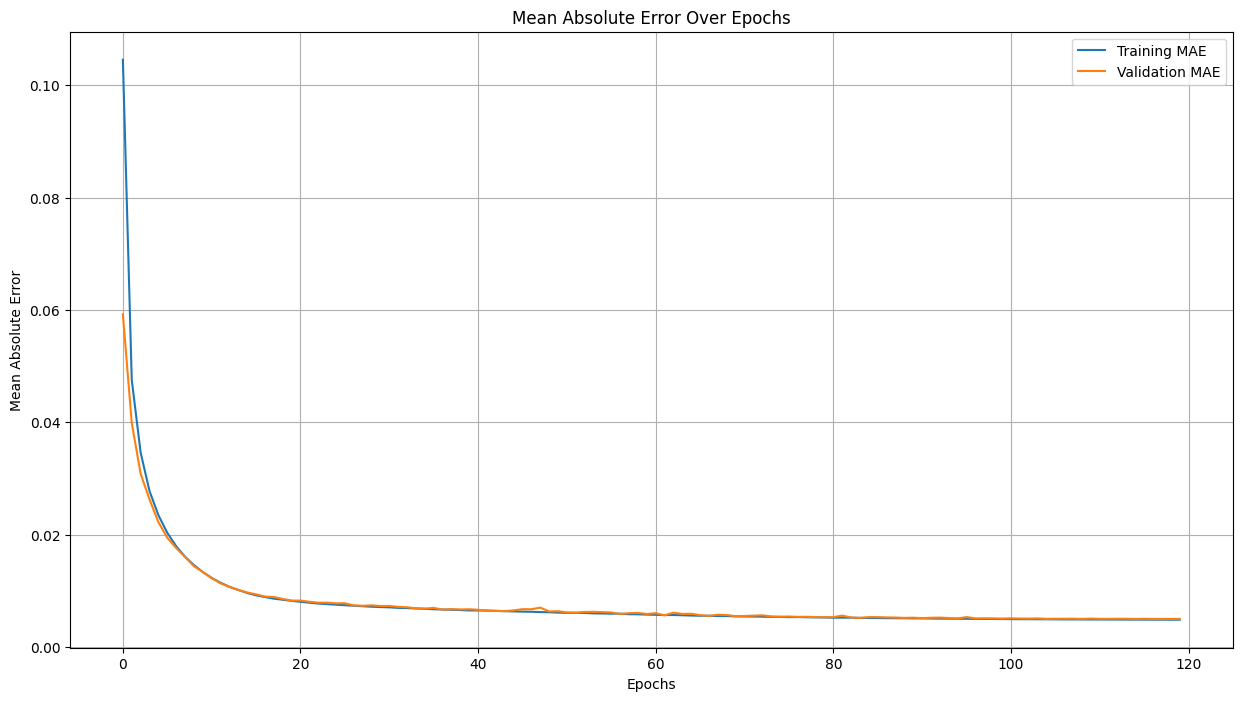

313/313 [==============================] - 0s 984us/step
Validation R² score: 0.982482548421587
Validation R² score: 0.982482548421587
Test R² score: 0.9839017996699954


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

In [ ]:
model.save('model__98_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/30
1125/1125 [==============================] - 2s 1ms/step - loss: 4.0840e-05 - mean_absolute_error: 0.0049 - val_loss: 4.3218e-05 - val_mean_absolute_error: 0.0050
Epoch 2/30
1125/1125 [==============================] - 2s 2ms/step - loss: 4.0840e-05 - mean_absolute_error: 0.0049 - val_loss: 4.3219e-05 - val_mean_absolute_error: 0.0050
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 4.0839e-05 - mean_absolute_error: 0.0049 - val_loss: 4.3220e-05 - val_mean_absolute_error: 0.0050
Epoch 4/30
1125/1125 [==============================] - 2s 1ms/step - loss: 4.0839e-05 - mean_absolute_error: 0.0049 - val_loss: 4.3221e-05 - val_mean_absolute_error: 0.0050
Epoch 5/30
1125/1125 [==============================] - 2s 1ms/step - loss: 4.0839e-05 - mean_absolute_error: 0.0049 - val_loss: 4.3222e-05 - val_mean_absolute_error: 0.0050
Epoch 6/30
1125/1125 [==============================] - 2s 2ms/step - loss: 4.0839e-05 - mean_absolute_error: 0.0049 - val_loss: 4

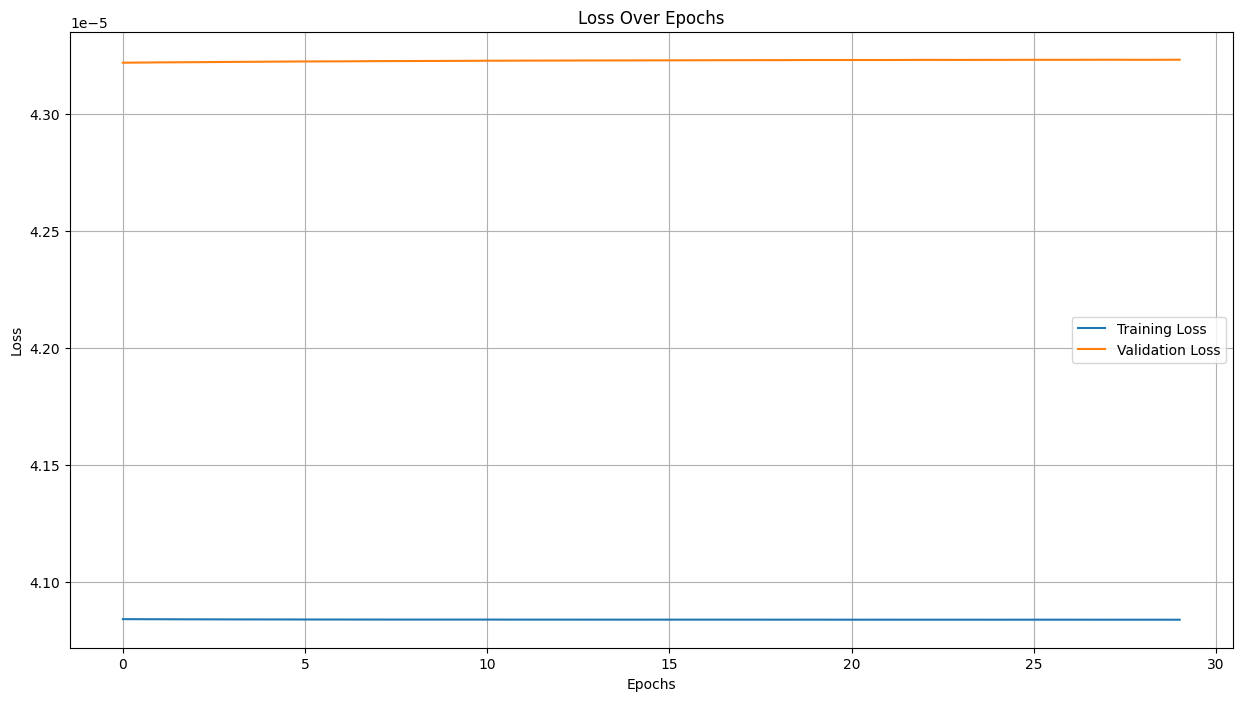

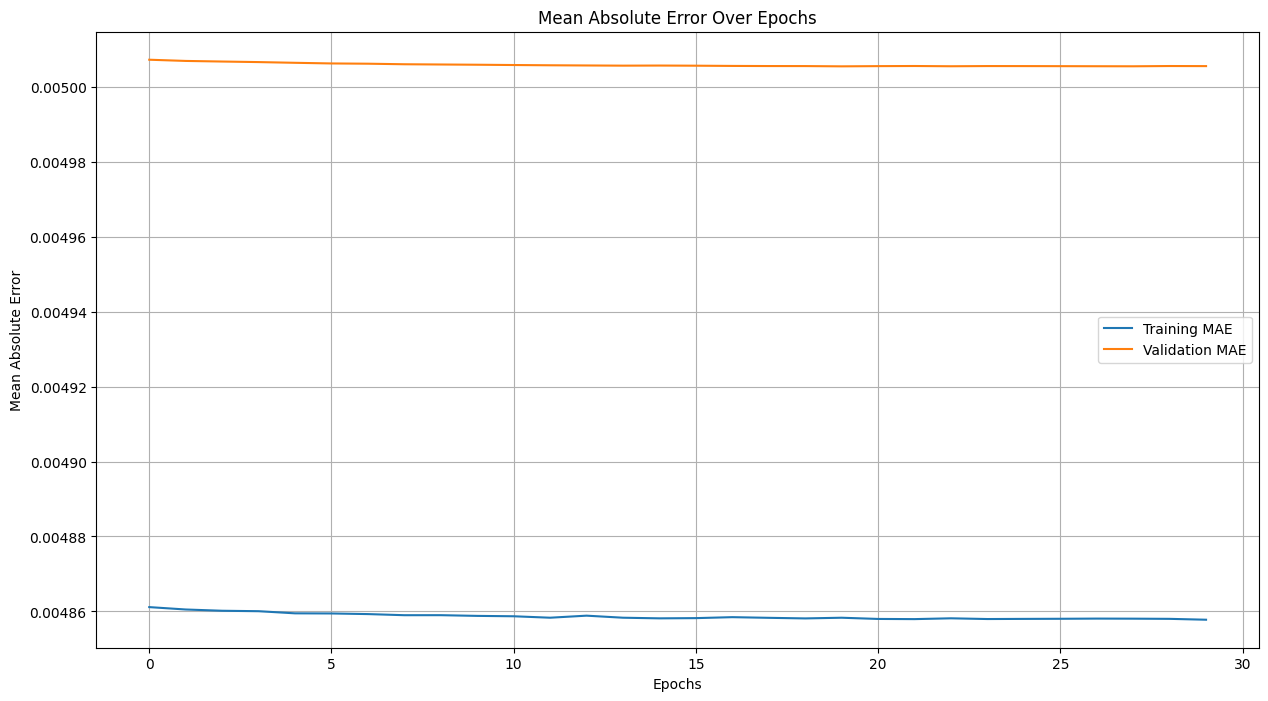

313/313 [==============================] - 0s 966us/step
Validation R² score: 0.9824768206178999
Validation R² score: 0.9824768206178999
Test R² score: 0.9838996462073959


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

######## no more improvment

more complex with the same parameters

In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu',input_shape=(20,)),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(1)
      ])

In [ ]:
# Total number of iterations (batches) for the training
epochs = 100
batch_size = 32
total_batches = len(X_train_scaled) // batch_size * epochs

# Create an instance of the OneCycleScheduler
one_cycle_scheduler = OneCycleScheduler(iterations=total_batches, max_rate=0.01)

optimizer = SGD(lr=0.001, momentum=0.9)

In [ ]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data = (X_val_scaled, y_val), batch_size=32, callbacks=[one_cycle_scheduler])

Epoch 1/100
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0322 - mean_absolute_error: 0.0951 - val_loss: 0.0048 - val_mean_absolute_error: 0.0551
Epoch 2/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0451 - val_loss: 0.0025 - val_mean_absolute_error: 0.0395
Epoch 3/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0344 - val_loss: 0.0016 - val_mean_absolute_error: 0.0318
Epoch 4/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0284 - val_loss: 0.0012 - val_mean_absolute_error: 0.0270
Epoch 5/100
1125/1125 [==============================] - 2s 2ms/step - loss: 9.5115e-04 - mean_absolute_error: 0.0243 - val_loss: 8.6053e-04 - val_mean_absolute_error: 0.0230
Epoch 6/100
1125/1125 [==============================] - 2s 2ms/step - loss: 7.2785e-04 - mean_absolute_error: 0.0212 - val_loss: 6.8161e-04 - val_mean_absol

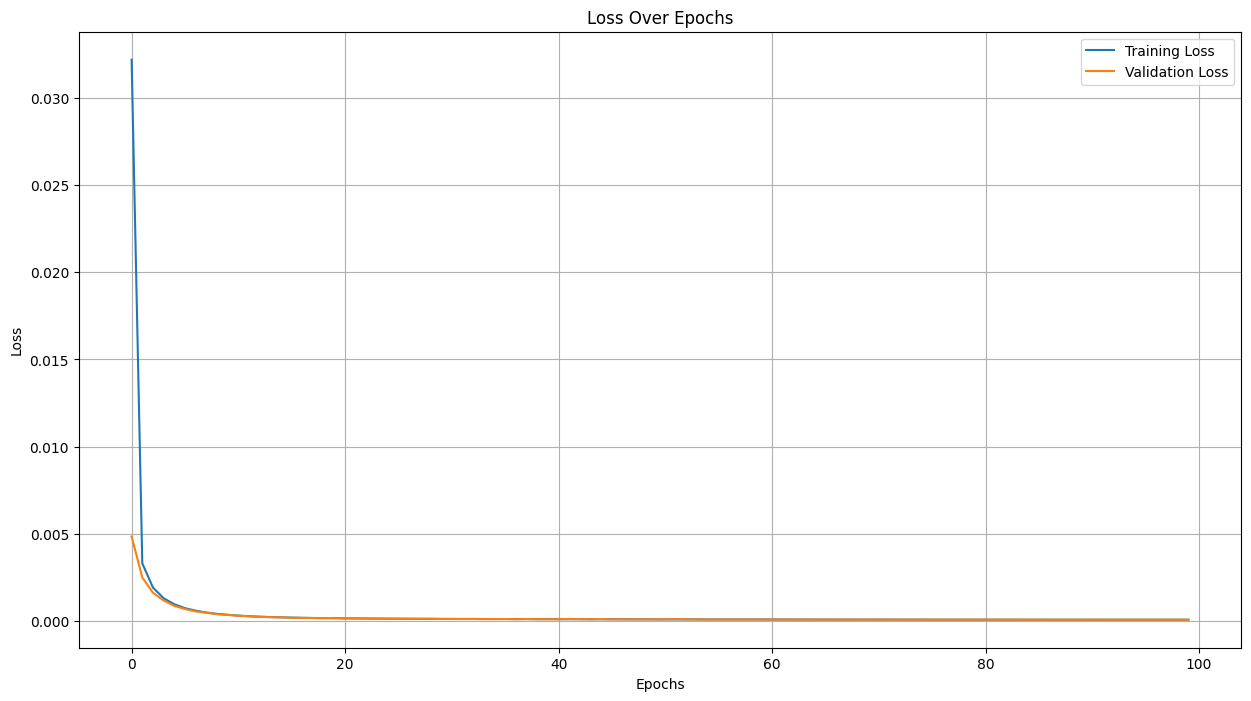

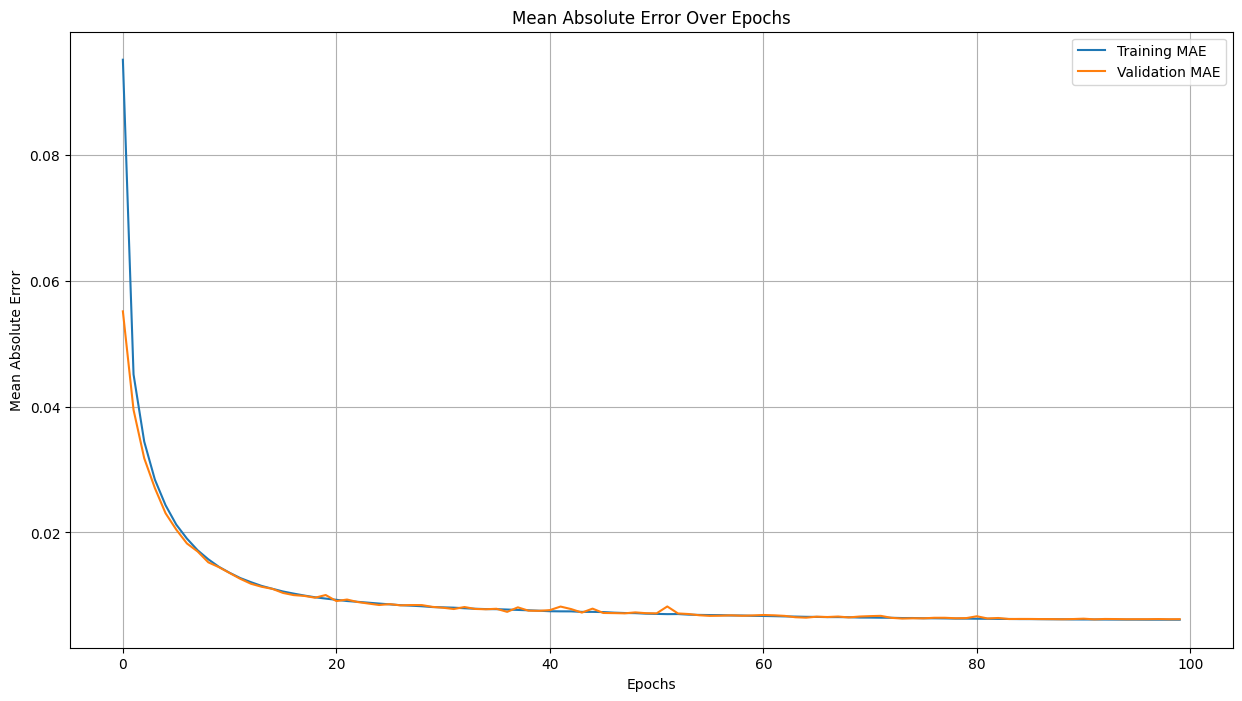

313/313 [==============================] - 0s 1ms/step
Validation R² score: 0.9732561490746788
Validation R² score: 0.9732561490746788
Test R² score: 0.972392890886413


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

#### more complexity not helping

tune with another opt scheduler

In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu',input_shape=(20,)),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(1)
      ])

In [ ]:
model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/100
1125/1125 [==============================] - 3s 2ms/step - loss: 0.0249 - mean_absolute_error: 0.0957 - val_loss: 0.0034 - val_mean_absolute_error: 0.0463
Epoch 2/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0373 - val_loss: 0.0016 - val_mean_absolute_error: 0.0310
Epoch 3/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0271 - val_loss: 0.0011 - val_mean_absolute_error: 0.0268
Epoch 4/100
1125/1125 [==============================] - 2s 2ms/step - loss: 6.6011e-04 - mean_absolute_error: 0.0202 - val_loss: 4.4195e-04 - val_mean_absolute_error: 0.0165
Epoch 5/100
1125/1125 [==============================] - 2s 2ms/step - loss: 3.5070e-04 - mean_absolute_error: 0.0146 - val_loss: 2.5965e-04 - val_mean_absolute_error: 0.0127
Epoch 6/100
1125/1125 [==============================] - 2s 2ms/step - loss: 1.8907e-04 - mean_absolute_error: 0.0107 - val_loss: 1.3517e-04 - val_me

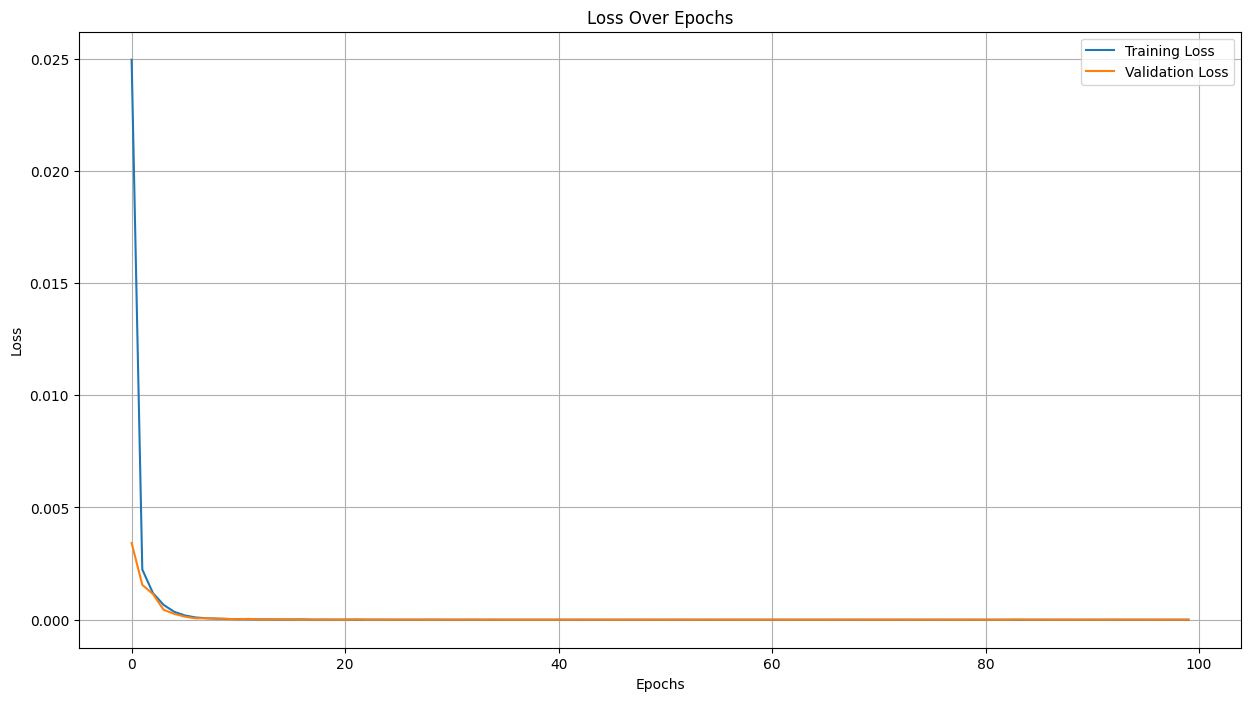

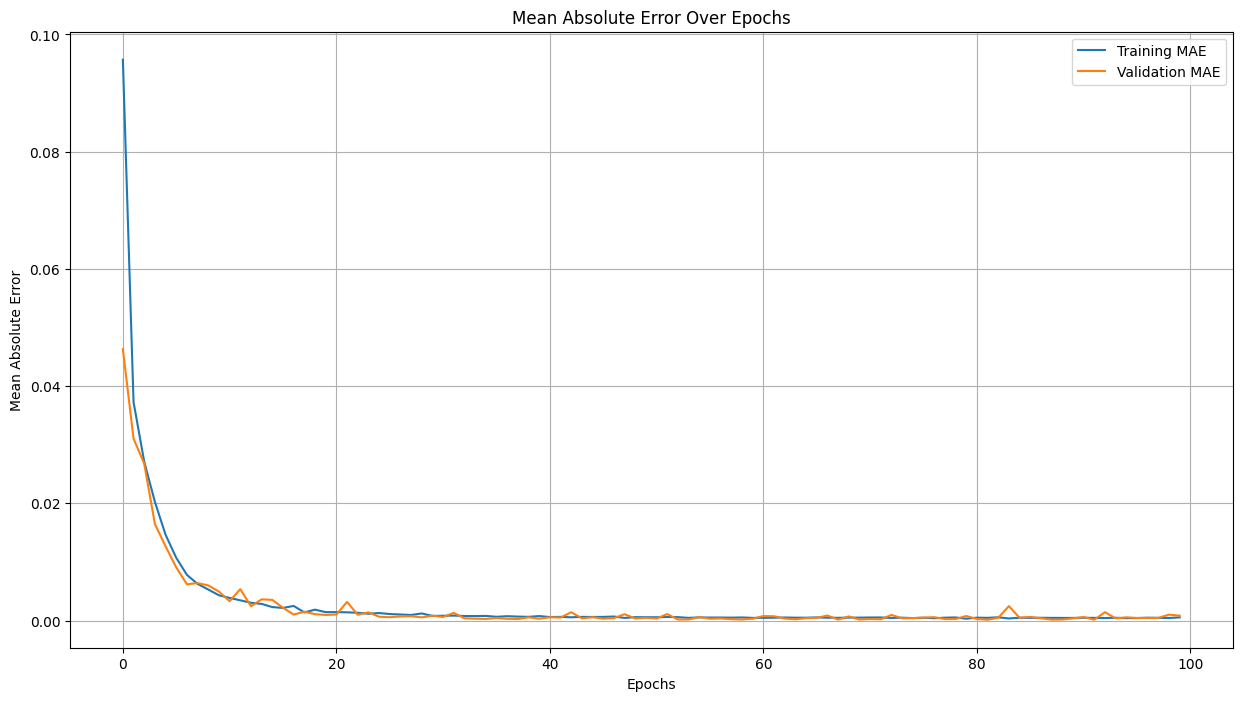

313/313 [==============================] - 0s 977us/step
Validation R² score: 0.9995994600302331
Validation R² score: 0.9995994600302331
Test R² score: 0.9996164845282101


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu',input_shape=(20,)),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
            keras.layers.Dense(1)
      ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1430 - mean_absolute_error: 0.2061 - val_loss: 0.0055 - val_mean_absolute_error: 0.0586
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0501 - val_loss: 0.0020 - val_mean_absolute_error: 0.0349
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0329 - val_loss: 0.0012 - val_mean_absolute_error: 0.0273
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.3767e-04 - mean_absolute_error: 0.0241 - val_loss: 6.9796e-04 - val_mean_absolute_error: 0.0211
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5.8279e-04 - mean_absolute_error: 0.0189 - val_loss: 4.7289e-04 - val_mean_absolute_error: 0.0171
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.4172e-04 - mean_absolute_error: 0.0144 - val_loss: 1.9681e-04 - val_mean_absolute_error: 0.0111
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - l

In [ ]:
from sklearn.metrics import r2_score

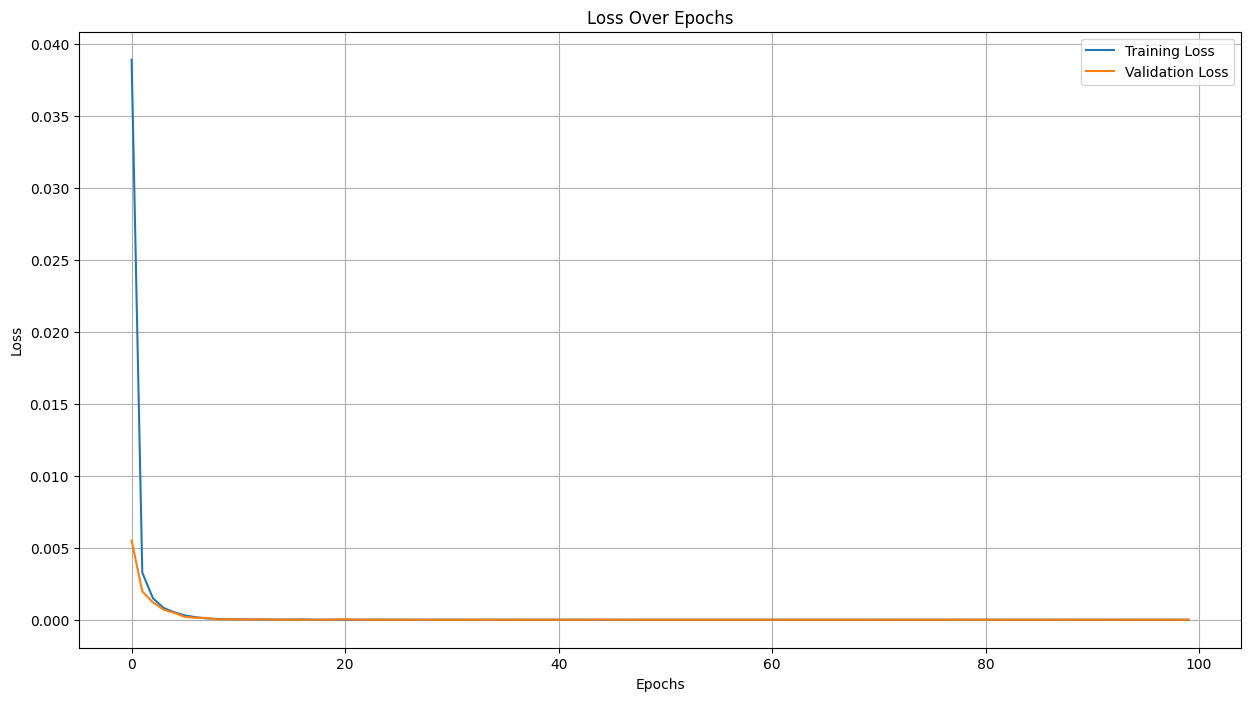

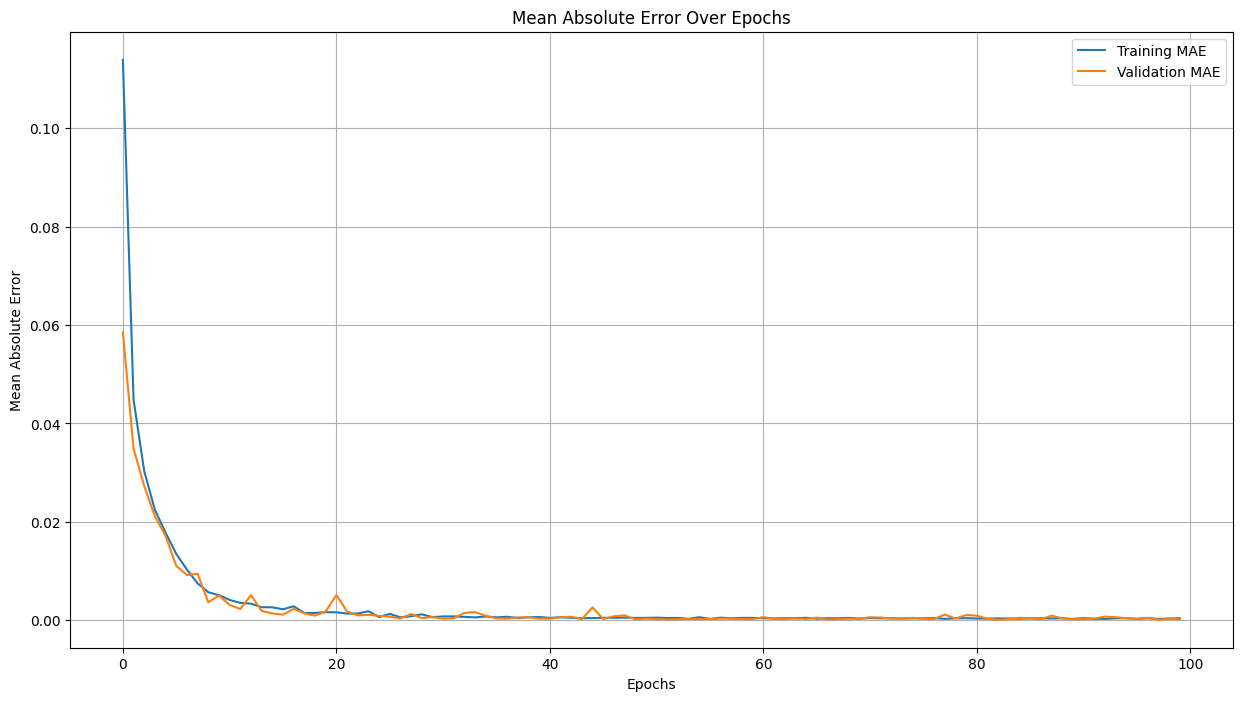

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation R² score: 0.9999807339052826
Validation R² score: 0.9999807339052826
Test R² score: 0.9999797473241332


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

try to prune the network (faster computational time )

In [ ]:
!pip install tensorflow_model_optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
import tensorflow_model_optimization as tfmot

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu', input_shape=(20,)),
    keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
    keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='selu'),
    keras.layers.Dense(1)
])

In [ ]:
model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(model)

# prune_low_magnitude
model_for_pruning.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])
model_for_pruning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_  (None, 50)                2052      
 4 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_  (None, 50)                5052      
 5 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_  (None, 50)                5052      
 6 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_  (None, 1)                 103       
 7 (PruneLowMagnitude)                                           
                                                                 
Total params: 12259 (47.90 KB)
Trainable params: 6201 

In [ ]:
import tempfile

In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

In [ ]:
model_for_pruning.fit(X_train_scaled, y_train, epochs=100, validation_data = (X_val_scaled, y_val), batch_size=32, callbacks=callbacks)

Epoch 1/100
   1/1125 [..............................] - ETA: 40:14 - loss: 0.6133 - mean_absolute_error: 0.6528

1125/1125 [==============================] - 5s 2ms/step - loss: 0.0196 - mean_absolute_error: 0.0865 - val_loss: 0.0028 - val_mean_absolute_error: 0.0419
Epoch 2/100
1125/1125 [==============================] - 2s 2ms/step - loss: 0.0018 - mean_absolute_error: 0.0328 - val_loss: 0.0012 - val_mean_absolute_error: 0.0273
Epoch 3/100
1125/1125 [==============================] - 2s 2ms/step - loss: 7.9305e-04 - mean_absolute_error: 0.0222 - val_loss: 6.1803e-04 - val_mean_absolute_error: 0.0197
Epoch 4/100
1125/1125 [==============================] - 2s 2ms/step - loss: 3.9273e-04 - mean_absolute_error: 0.0156 - val_loss: 2.9110e-04 - val_mean_absolute_error: 0.0133
Epoch 5/100
1125/1125 [==============================] - 2s 2ms/step - loss: 2.0825e-04 - mean_absolute_error: 0.0113 - val_loss: 1.7107e-04 - val_mean_absolute_error: 0.0102
Epoch 6/100
1125/1125 [==============================] - 2s 2ms/step - loss: 1.0842e-04 - mean_absolute_error: 0.0081 - val_loss: 7.6973e-05 - val_mean_a

In [ ]:
y_train_pred = model_for_pruning.predict(X_train_scaled)
y_val_pred = model_for_pruning.predict(X_val_scaled)
y_test_pred = model_for_pruning.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

313/313 [==============================] - 1s 1ms/step
Validation R² score: 0.9999718379798542
Validation R² score: 0.9999718379798542
Test R² score: 0.9999715336095674


if you compaire between this model with pruning and the prev one in the time taken for each epochs you can see the difference in time


### Use randomSearch CV to turn

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def create_model(optimizer='adam', activation='relu', neurons=50):
    model = Sequential()

    # Add layers
    model.add(Dense(neurons, kernel_initializer='lecun_normal', activation=activation, input_shape=(20,)))
    model.add(Dense(neurons, kernel_initializer='lecun_normal', activation=activation))
    model.add(Dense(neurons, kernel_initializer='lecun_normal', activation=activation))
    model.add(Dense(1))  # Output layer

    # Compile model
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model


In [ ]:
model = KerasRegressor(build_fn=create_model)


In [ ]:
param_dist = {
    'batch_size': [16, 32, 64, 128],
    'epochs': [10],
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__activation': ['relu', 'tanh', 'selu'],
    'model__neurons': [30, 50, 70]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, cv=3, random_state=42, error_score='raise' ,verbose=1 ,n_jobs=-1 )


In [ ]:
# verbose=0: No output will be displayed. The function runs silently without printing anything to the console.

# verbose=1: Minimal output is shown. You will see messages indicating the progress of the fitting process, such as when a new set of hyperparameters is being tried.

# verbose=2: More detailed output is displayed. This might include messages for each cross-validation fold being evaluated, providing even more insights into the fitting process.

# the defualt is 0

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
random_search_result = random_search.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1211 - mean_absolute_error: 0.2132
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0145 - mean_absolute_error: 0.0945
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0083 - mean_absolute_error: 0.0716
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0594
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0044 - mean_absolute_error: 0.0521
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0459
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0028 - mean_absolute_error: 0.0415
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024 - mean_absolute_error: 0.0385
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - mean_absolute_error: 0.0354
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018 - mean_absolute_error: 0.0330
261/261 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1484 - mean_absolute_error: 0.2280
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0142 - mean_absolute_error: 0.0932
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0707
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0058 - mean_absolute_error: 0.0597
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0043 - mean_absolute_error: 0.0512
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0457
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0028 - mean_absolute_error: 0.0412
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0023 - mean_absolute_error: 0.0376
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - mean_absolute_error: 0.0351
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0017 - mean_absolute_error: 0.0323
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0942 - mean_absolute_error: 0.2162
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0142 - mean_absolute_error: 0.0931
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0079 - mean_absolute_error: 0.0697
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0055 - mean_absolute_error: 0.0579
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0502
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0033 - mean_absolute_error: 0.0447
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0403
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0023 - mean_absolute_error: 0.0372
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - mean_absolute_error: 0.0346
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0325
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0186 - mean_absolute_error: 0.0634
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1.5595e-04 - mean_absolute_error: 0.0096
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.3851e-05 - mean_absolute_error: 0.0066
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.4392e-05 - mean_absolute_error: 0.0051
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.2873e-05 - mean_absolute_error: 0.0044
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.5556e-05 - mean_absolute_error: 0.0039
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.1155e-05 - mean_absolute_error: 0.0036
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.8096e-05 - mean_absolute_error: 0.0033
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.6231e-05 - mean_absolute_error: 0.0031
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.5001e-05 - mean_absolut

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0157 - mean_absolute_error: 0.0615
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6928e-04 - mean_absolute_error: 0.0100
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 8.4374e-05 - mean_absolute_error: 0.0070
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.1500e-05 - mean_absolute_error: 0.0055
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.4929e-05 - mean_absolute_error: 0.0045
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6536e-05 - mean_absolute_error: 0.0039
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3692e-05 - mean_absolute_error: 0.0037
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9862e-05 - mean_absolute_error: 0.0034
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7130e-05 - mean_absolute_error: 0.0032
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5248e-05 - mean_absolut

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0168 - mean_absolute_error: 0.0632
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 1.4181e-04 - mean_absolute_error: 0.0091
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 6.6324e-05 - mean_absolute_error: 0.0063
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.1028e-05 - mean_absolute_error: 0.0049
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.2327e-05 - mean_absolute_error: 0.0044
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2.6319e-05 - mean_absolute_error: 0.0039
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.3092e-05 - mean_absolute_error: 0.0037
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2.0397e-05 - mean_absolute_error: 0.0035
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 1.8765e-05 - mean_absolute_error: 0.0034
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.7733e-05 - mean_absol

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0094 - mean_absolute_error: 0.0579
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.4958e-04 - mean_absolute_error: 0.0096
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.5540e-05 - mean_absolute_error: 0.0068
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.3444e-05 - mean_absolute_error: 0.0058
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.3970e-05 - mean_absolute_error: 0.0053
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.5949e-05 - mean_absolute_error: 0.0048
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 3.1392e-05 - mean_absolute_error: 0.0044
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.8109e-05 - mean_absolute_error: 0.0042
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.5286e-05 - mean_absolute_error: 0.0040
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3750e-05 - mean_absolut

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0587
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1.6392e-04 - mean_absolute_error: 0.0101
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.5028e-05 - mean_absolute_error: 0.0073
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.7314e-05 - mean_absolute_error: 0.0060
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.4794e-05 - mean_absolute_error: 0.0053
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.5949e-05 - mean_absolute_error: 0.0048
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.0987e-05 - mean_absolute_error: 0.0044
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6472e-05 - mean_absolute_error: 0.0041
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3560e-05 - mean_absolute_error: 0.0039
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1655e-05 - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0558
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5967e-04 - mean_absolute_error: 0.0099
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.8089e-05 - mean_absolute_error: 0.0074
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.1852e-05 - mean_absolute_error: 0.0063
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.9402e-05 - mean_absolute_error: 0.0056
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.9056e-05 - mean_absolute_error: 0.0050
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3002e-05 - mean_absolute_error: 0.0046
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8578e-05 - mean_absolute_error: 0.0043
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.5092e-05 - mean_absolute_error: 0.0040
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2192e-05 - mean_absolut

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0421 - mean_absolute_error: 0.1605
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0151 - mean_absolute_error: 0.0971
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0098 - mean_absolute_error: 0.0777
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0076 - mean_absolute_error: 0.0682
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062 - mean_absolute_error: 0.0622
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053 - mean_absolute_error: 0.0571
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0529
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - mean_absolute_error: 0.0510
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0040 - mean_absolute_error: 0.0495
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - mean_absolute_error: 0.0471
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0461 - mean_absolute_error: 0.1662
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0145 - mean_absolute_error: 0.0958
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0091 - mean_absolute_error: 0.0757
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0066 - mean_absolute_error: 0.0642
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - mean_absolute_error: 0.0575
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0046 - mean_absolute_error: 0.0532
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - mean_absolute_error: 0.0498
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - mean_absolute_error: 0.0471
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0033 - mean_absolute_error: 0.0453
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031 - mean_absolute_error: 0.0435
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1219 - mean_absolute_error: 0.2342
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0175 - mean_absolute_error: 0.1049
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0104 - mean_absolute_error: 0.0807
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0076 - mean_absolute_error: 0.0683
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061 - mean_absolute_error: 0.0610
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0052 - mean_absolute_error: 0.0563
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0528
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0041 - mean_absolute_error: 0.0500
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0038 - mean_absolute_error: 0.0480
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - mean_absolute_error: 0.0459
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0414 - mean_absolute_error: 0.1554
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0110 - mean_absolute_error: 0.0828
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 - mean_absolute_error: 0.0657
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - mean_absolute_error: 0.0560
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0502
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0033 - mean_absolute_error: 0.0448
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0028 - mean_absolute_error: 0.0413
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0024 - mean_absolute_error: 0.0387
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0362
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019 - mean_absolute_error: 0.0342
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0522 - mean_absolute_error: 0.1654
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0115 - mean_absolute_error: 0.0845
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072 - mean_absolute_error: 0.0663
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0569
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0043 - mean_absolute_error: 0.0514
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036 - mean_absolute_error: 0.0468
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0030 - mean_absolute_error: 0.0434
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027 - mean_absolute_error: 0.0409
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024 - mean_absolute_error: 0.0383
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0367
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0970 - mean_absolute_error: 0.2013
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0112 - mean_absolute_error: 0.0831
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070 - mean_absolute_error: 0.0659
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0052 - mean_absolute_error: 0.0564
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0041 - mean_absolute_error: 0.0504
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - mean_absolute_error: 0.0458
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0029 - mean_absolute_error: 0.0421
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0392
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0369
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - mean_absolute_error: 0.0348
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0346 - mean_absolute_error: 0.1050
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6571e-04 - mean_absolute_error: 0.0186
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9855e-04 - mean_absolute_error: 0.0134
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0109e-04 - mean_absolute_error: 0.0110
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5482e-04 - mean_absolute_error: 0.0096
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1545e-04 - mean_absolute_error: 0.0083
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.3811e-05 - mean_absolute_error: 0.0075
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8249e-05 - mean_absolute_error: 0.0069
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0292e-05 - mean_absolute_error: 0.0064
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1156e-05 - mean_absolute_error: 0.0060
261/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0335 - mean_absolute_error: 0.1066
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0217e-04 - mean_absolute_error: 0.0207
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2270e-04 - mean_absolute_error: 0.0140
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1320e-04 - mean_absolute_error: 0.0113
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4053e-04 - mean_absolute_error: 0.0091
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0933e-04 - mean_absolute_error: 0.0081
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5710e-05 - mean_absolute_error: 0.0071
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3079e-05 - mean_absolute_error: 0.0066
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2453e-05 - mean_absolute_error: 0.0061
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6763e-05 - mean_absolute_error: 0.0059
261/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0365 - mean_absolute_error: 0.1102
Epoch 2/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1563e-04 - mean_absolute_error: 0.0176
Epoch 3/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7771e-04 - mean_absolute_error: 0.0130
Epoch 4/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8479e-04 - mean_absolute_error: 0.0106
Epoch 5/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4451e-04 - mean_absolute_error: 0.0093
Epoch 6/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1603e-04 - mean_absolute_error: 0.0083
Epoch 7/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.8417e-05 - mean_absolute_error: 0.0076
Epoch 8/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3377e-05 - mean_absolute_error: 0.0070
Epoch 9/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3490e-05 - mean_absolute_error: 0.0066
Epoch 10/10
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6008e-05 - mean_absolute_error: 0.0062
261/

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0184 - mean_absolute_error: 0.0898
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.0011e-04 - mean_absolute_error: 0.0156
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5476e-04 - mean_absolute_error: 0.0097
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.4786e-05 - mean_absolute_error: 0.0068
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.8422e-05 - mean_absolute_error: 0.0054
Epoch 6/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7892e-05 - mean_absolute_error: 0.0042
Epoch 7/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2591e-05 - mean_absolute_error: 0.0037
Epoch 8/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3658e-05 - mean_absolute_error: 0.0029
Epoch 9/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0068e-05 - mean_absolute_error: 0.0025
Epoch 10/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.5742e-06 - mean_absolut

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0247 - mean_absolute_error: 0.0980
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.1482e-04 - mean_absolute_error: 0.0159
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6473e-04 - mean_absolute_error: 0.0101
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.4447e-05 - mean_absolute_error: 0.0076
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.9006e-05 - mean_absolute_error: 0.0060
Epoch 6/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.3978e-05 - mean_absolute_error: 0.0046
Epoch 7/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8568e-05 - mean_absolute_error: 0.0042
Epoch 8/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8382e-05 - mean_absolute_error: 0.0033
Epoch 9/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1711e-05 - mean_absolute_error: 0.0026
Epoch 10/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.2953e-06 - mean_absolut

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0255 - mean_absolute_error: 0.0992
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.0373e-04 - mean_absolute_error: 0.0175
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0156e-04 - mean_absolute_error: 0.0111
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1656e-04 - mean_absolute_error: 0.0085
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9284e-05 - mean_absolute_error: 0.0065
Epoch 6/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.4332e-05 - mean_absolute_error: 0.0052
Epoch 7/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.1870e-05 - mean_absolute_error: 0.0044
Epoch 8/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0288e-05 - mean_absolute_error: 0.0035
Epoch 9/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7903e-05 - mean_absolute_error: 0.0032
Epoch 10/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.4581e-06 - mean_absolut

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0692 - mean_absolute_error: 0.1616
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0020 - mean_absolute_error: 0.0347
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.0484e-04 - mean_absolute_error: 0.0236
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.0190e-04 - mean_absolute_error: 0.0174
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7193e-04 - mean_absolute_error: 0.0127
Epoch 6/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4796e-04 - mean_absolute_error: 0.0092
Epoch 7/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.7325e-05 - mean_absolute_error: 0.0067
Epoch 8/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.5582e-05 - mean_absolute_error: 0.0057
Epoch 9/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.4108e-05 - mean_absolute_error: 0.0045
Epoch 10/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1017e-05 - mean_absolute_er

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1311 - mean_absolute_error: 0.2004
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0438
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0299
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.8987e-04 - mean_absolute_error: 0.0221
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6057e-04 - mean_absolute_error: 0.0168
Epoch 6/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9057e-04 - mean_absolute_error: 0.0133
Epoch 7/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7864e-04 - mean_absolute_error: 0.0104
Epoch 8/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1713e-04 - mean_absolute_error: 0.0084
Epoch 9/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.4277e-05 - mean_absolute_error: 0.0067
Epoch 10/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.1549e-05 - mean_absolute_error:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1866 - mean_absolute_error: 0.2261
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0444
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0290
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.0354e-04 - mean_absolute_error: 0.0222
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.8314e-04 - mean_absolute_error: 0.0171
Epoch 6/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.0256e-04 - mean_absolute_error: 0.0136
Epoch 7/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9339e-04 - mean_absolute_error: 0.0109
Epoch 8/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3884e-04 - mean_absolute_error: 0.0092
Epoch 9/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.6190e-05 - mean_absolute_error: 0.0072
Epoch 10/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.3670e-05 - mean_absolute_error:

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1055 - mean_absolute_error: 0.2111
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 - mean_absolute_error: 0.0805
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0075 - mean_absolute_error: 0.0685
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 - mean_absolute_error: 0.0610
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - mean_absolute_error: 0.0558
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - mean_absolute_error: 0.0515
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mean_absolute_error: 0.0482
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0456
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0437
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - mean_absolute_error: 0.0413
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0915 - mean_absolute_error: 0.2051
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0113 - mean_absolute_error: 0.0833
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - mean_absolute_error: 0.0729
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - mean_absolute_error: 0.0651
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0057 - mean_absolute_error: 0.0590
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - mean_absolute_error: 0.0553
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0045 - mean_absolute_error: 0.0522
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040 - mean_absolute_error: 0.0493
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0036 - mean_absolute_error: 0.0467
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - mean_absolute_error: 0.0450
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0699 - mean_absolute_error: 0.1822
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0101 - mean_absolute_error: 0.0796
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - mean_absolute_error: 0.0675
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0593
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - mean_absolute_error: 0.0547
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - mean_absolute_error: 0.0511
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0482
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0034 - mean_absolute_error: 0.0458
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - mean_absolute_error: 0.0440
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - mean_absolute_error: 0.0422
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0328 - mean_absolute_error: 0.1052
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0021 - mean_absolute_error: 0.0362
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0014 - mean_absolute_error: 0.0295
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0259
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 9.0626e-04 - mean_absolute_error: 0.0234
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 7.7144e-04 - mean_absolute_error: 0.0216
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6.7798e-04 - mean_absolute_error: 0.0203
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.2421e-04 - mean_absolute_error: 0.0194
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.5545e-04 - mean_absolute_error: 0.0184
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.1975e-04 - mean_absolute_error: 0.0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0231 - mean_absolute_error: 0.0994
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0028 - mean_absolute_error: 0.0417
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0018 - mean_absolute_error: 0.0330
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0281
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0253
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 8.8065e-04 - mean_absolute_error: 0.0231
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 7.6586e-04 - mean_absolute_error: 0.0215
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 6.7332e-04 - mean_absolute_error: 0.0200
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 6.1147e-04 - mean_absolute_error: 0.0192
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.5850e-04 - mean_absolute_error: 0.0183


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0409 - mean_absolute_error: 0.1073
Epoch 2/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0024 - mean_absolute_error: 0.0386
Epoch 3/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0308
Epoch 4/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0012 - mean_absolute_error: 0.0266
Epoch 5/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9.7200e-04 - mean_absolute_error: 0.0244
Epoch 6/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 8.2275e-04 - mean_absolute_error: 0.0225
Epoch 7/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.2327e-04 - mean_absolute_error: 0.0211
Epoch 8/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 6.4656e-04 - mean_absolute_error: 0.0199
Epoch 9/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.8719e-04 - mean_absolute_error: 0.0189
Epoch 10/10
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5151e-04 - mean_absolute_error: 0.0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.0570
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7542e-04 - mean_absolute_error: 0.0104
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.8843e-05 - mean_absolute_error: 0.0065
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.6605e-05 - mean_absolute_error: 0.0047
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.5441e-05 - mean_absolute_error: 0.0031
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.3104e-06 - mean_absolute_error: 0.0022
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7294e-06 - mean_absolute_error: 0.0012
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4178e-06 - mean_absolute_error: 8.5284e-04
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5219e-06 - mean_absolute_error: 8.6280e-04
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.1194e-06 - mean

In [ ]:
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'model__optimizer': 'adam', 'model__neurons': 50, 'model__activation': 'relu', 'epochs': 10, 'batch_size': 32}
Best Score: 0.9959505789364739


In [ ]:
model = keras.models.Sequential([
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='relu',input_shape=(20,)),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='relu'),
            keras.layers.Dense(50, kernel_initializer='lecun_normal', activation='relu'),
            keras.layers.Dense(1)
      ])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data = (X_val_scaled, y_val), batch_size=32)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0097 - mean_absolute_error: 0.0631 - val_loss: 2.4825e-04 - val_mean_absolute_error: 0.0124
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.9680e-04 - mean_absolute_error: 0.0110 - val_loss: 1.0427e-04 - val_mean_absolute_error: 0.0080
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.3471e-05 - mean_absolute_error: 0.0076 - val_loss: 5.6947e-05 - val_mean_absolute_error: 0.0060
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9201e-05 - mean_absolute_error: 0.0055 - val_loss: 8.3920e-05 - val_mean_absolute_error: 0.0077
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.4991e-05 - mean_absolute_error: 0.0046 - val_loss: 1.9422e-05 - val_mean_absolute_error: 0.0035
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3389e-05 - mean_absolute_error: 0.0038 - val_loss: 2.9802e-05 - val_mean_absolute_error: 0.0046
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s

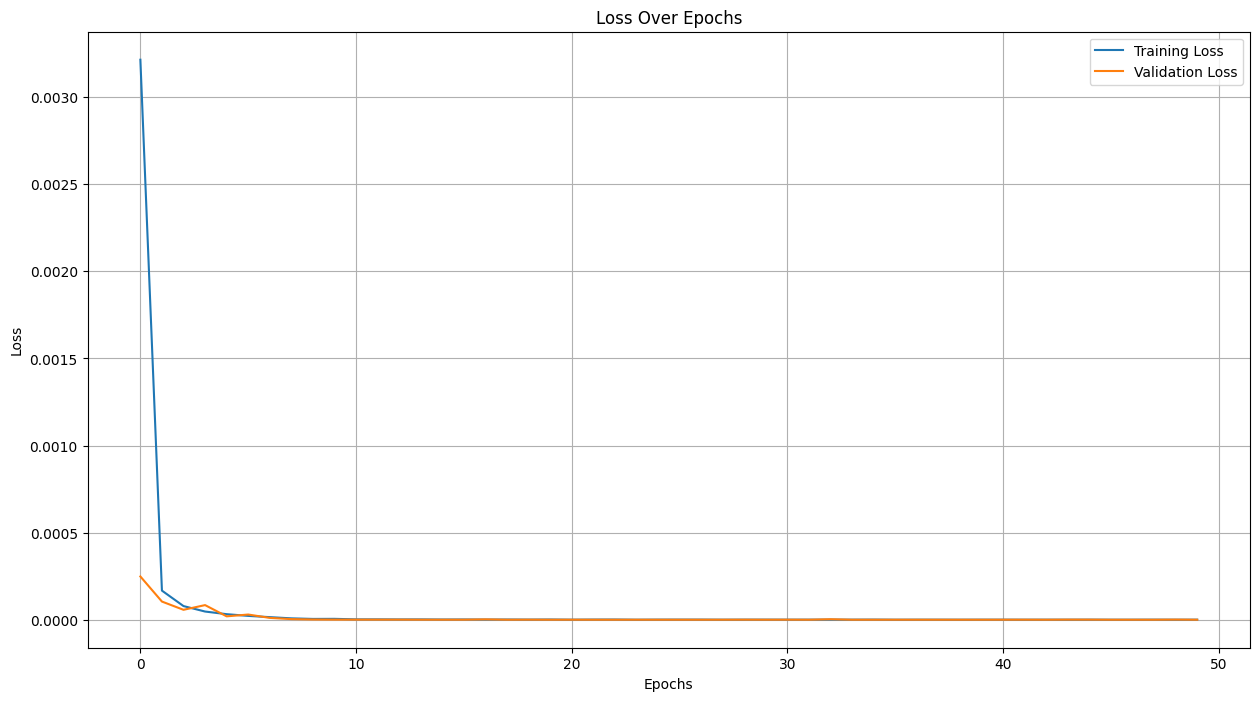

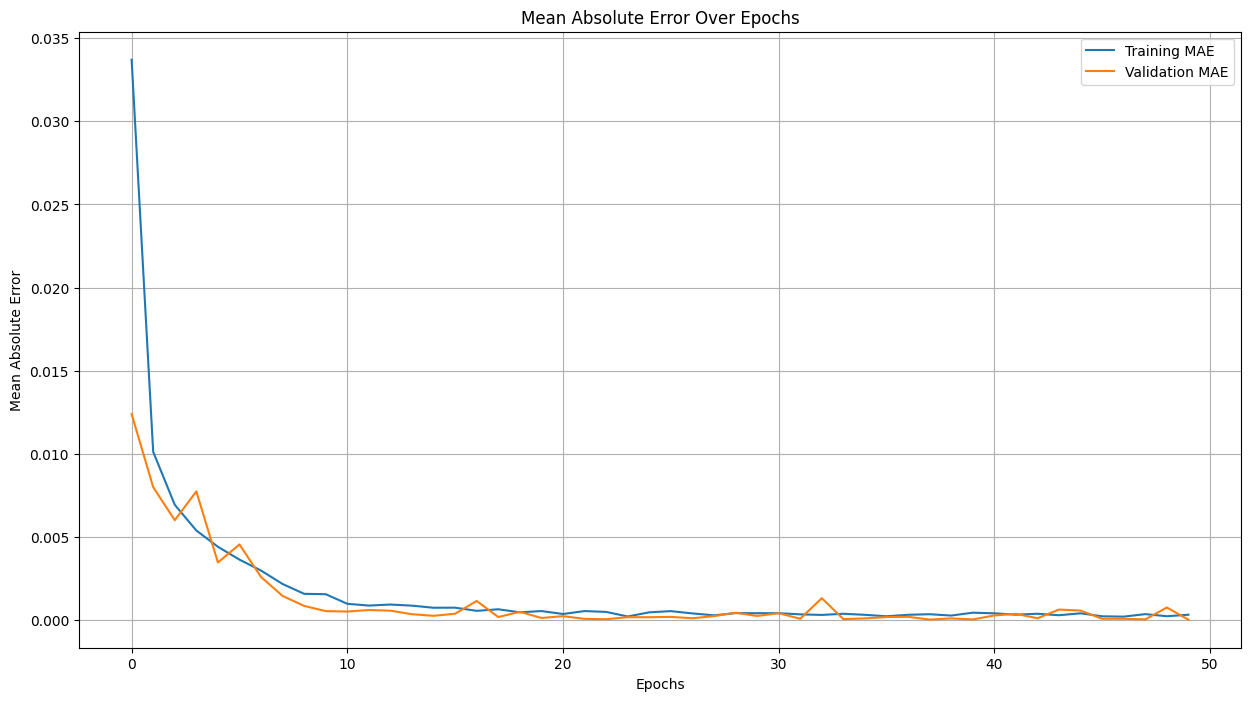

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation R² score: 0.9999986974486765
Validation R² score: 0.9999986974486765
Test R² score: 0.9999991521905277


In [ ]:
history_df = pd.DataFrame(history.history)

# Plot Loss
plt.figure(figsize=(15, 8))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(15, 8))
plt.plot(history_df['mean_absolute_error'], label='Training MAE')
plt.plot(history_df['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Validation R² score: {r2_val}')
print(f'Validation R² score: {r2_val}')
print(f'Test R² score: {r2_test}')

Even better value with only 50 epochs

### using RandomSearch from keras_tuner

In [ ]:
def create_model(neurons1, neurons2, lr , activation ,initializer):
    model = keras.models.Sequential([
            keras.layers.Dense(neurons1, kernel_initializer=initializer, activation=activation ,input_shape=(20,)),
            keras.layers.Dense(neurons2, kernel_initializer=initializer, activation=activation),
            keras.layers.Dense(neurons2, kernel_initializer=initializer, activation=activation),
            keras.layers.Dense(1)
      ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')
    return model

def build_model(hp):
    neurons1 = hp.Int("units1", min_value=32, max_value=512, step=32)
    neurons2 = hp.Int("units2", min_value=32, max_value=512, step=32)
    lr = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    activation=hp.Choice('activation', ['relu', 'tanh', 'selu'])
    initializer=hp.Choice('initializer', ['lecun_normal', 'he_normal', 'glorot_normal'])

    model = create_model(
        neurons1=neurons1, neurons2=neurons2, lr=lr , activation=activation , initializer=initializer
    )
    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1, # only one run for each model -> many runs help to see how model work with diff W's random initialization
    overwrite=True
    )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32)

In [ ]:
best_model = tuner.get_best_models()[0]
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


#### try with BayesianOptimization

In [ ]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    overwrite=True)

In [ ]:
tuner.search(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32)